In [36]:
#Bankruptcy Case
bankrupt.df <- read.csv("Bankruptcy.csv", header = TRUE)  # load Bankruptcy.csv
str(bankrupt.df) # get a sense of the columns of data
table(is.na(bankrupt.df))  # check for NAs and NaNs

'data.frame':	132 obs. of  27 variables:
 $ NO : int  1 2 3 4 5 6 7 8 9 10 ...
 $ D  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ YR : int  78 77 72 80 81 70 76 77 73 71 ...
 $ R1 : num  0.23 0.19 0.07 0.07 0.09 0.24 0.08 0.1 0.16 0.16 ...
 $ R2 : num  0.08 0.07 0.02 0.03 0.02 0.07 0.04 0.02 0.09 0.08 ...
 $ R3 : num  0.02 0.09 0.03 0.04 0.03 0.14 0.02 0.02 0.07 0.06 ...
 $ R4 : num  0.03 0.12 0.05 0.04 0.04 0.22 0.03 0.04 0.1 0.08 ...
 $ R5 : num  0.46 0.02 0.06 0.04 0.06 0.1 0.3 -0.05 0.1 0.03 ...
 $ R6 : num  0.12 0.02 0.1 0.06 0.08 0.18 0.13 -0.06 0.08 0.02 ...
 $ R7 : num  0.19 0.03 0.14 0.06 0.11 0.29 0.21 -0.09 0.11 0.03 ...
 $ R8 : num  10.36 3.13 2.41 5.55 2.85 ...
 $ R9 : num  1.17 1.73 1.36 1.13 1.88 1.37 0.82 1.17 1.64 1.58 ...
 $ R10: num  0.4 0.6 0.41 0.44 0.42 0.43 0.42 0.24 0.91 0.75 ...
 $ R11: num  0.1 0.78 0.66 0.58 0.62 0.79 0.18 0.27 0.72 0.55 ...
 $ R12: num  0.14 0.63 0.7 0.57 0.46 0.92 0.36 0.37 0.62 0.47 ...
 $ R13: num  0.13 0.05 -0.01 -0.02 0.01 0.03 0.03 -0.07 0.04 0.0


FALSE 
 3564 

In [37]:
# Thought: D is the decision variables (bankrupt yes/no)
# Thought: only 132 records, but well balanced (66 bankrupt, 66 healthy firms)
# Thought: will probably want to normalize the variables as some have larger ranges relative to others
# Thought: no NAs or NaNs (missing tems/numbers)
# Thought: have to get rid of column NO (just an identifier)
# Thought: while the year variable may tell us something related to the economic cycle, it is less fincnial than R1-R24, and may need to be stripped.

#Checking out the data
dim(bankrupt.df)  # find the dimension of data frame
head(bankrupt.df)  # take a peak at the first six rows
colnames(bankrupt.df) # print column names
summary(bankrupt.df) #get descriptive statistics of column variables

[1] 132  27

NO,D,YR,R1,R2,R3,R4,R5,R6,R7,⋯,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,⋯,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,⋯,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,⋯,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,⋯,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,⋯,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06
6,0,70,0.24,0.07,0.14,0.22,0.10,0.18,0.29,⋯,0.10,0.06,0.11,0.18,9.82,1.82,1.60,0.06,0.11,0.18


[1] "NO"  "D"   "YR"  "R1"  "R2"  "R3"  "R4"  "R5"  "R6"  "R7"  "R8"  "R9" 
[13] "R10" "R11" "R12" "R13" "R14" "R15" "R16" "R17" "R18" "R19" "R20" "R21"
[25] "R22" "R23" "R24"

       NO               D             YR              R1        
 Min.   :  1.00   Min.   :0.0   Min.   :70.00   Min.   :0.0000  
 1st Qu.: 33.75   1st Qu.:0.0   1st Qu.:72.00   1st Qu.:0.0700  
 Median : 66.50   Median :0.5   Median :74.00   Median :0.1500  
 Mean   : 66.50   Mean   :0.5   Mean   :74.02   Mean   :0.2917  
 3rd Qu.: 99.25   3rd Qu.:1.0   3rd Qu.:76.00   3rd Qu.:0.2725  
 Max.   :132.00   Max.   :1.0   Max.   :82.00   Max.   :4.9200  
       R2                R3                R4               R5          
 Min.   :0.00000   Min.   :0.00000   Min.   :0.0000   Min.   :-1.40000  
 1st Qu.:0.02000   1st Qu.:0.03000   1st Qu.:0.0400   1st Qu.: 0.01000  
 Median :0.03000   Median :0.05000   Median :0.0800   Median : 0.03000  
 Mean   :0.06136   Mean   :0.07379   Mean   :0.1558   Mean   : 0.04152  
 3rd Qu.:0.06000   3rd Qu.:0.09000   3rd Qu.:0.1725   3rd Qu.: 0.08000  
 Max.   :1.00000   Max.   :0.64000   Max.   :1.3800   Max.   : 0.46000  
       R6                 R7      

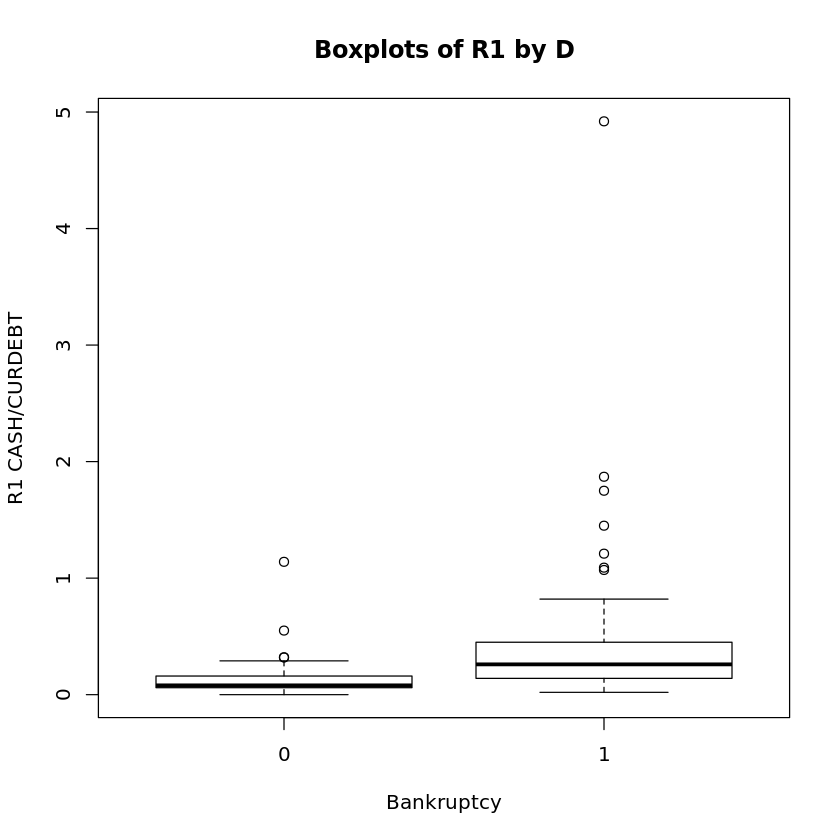

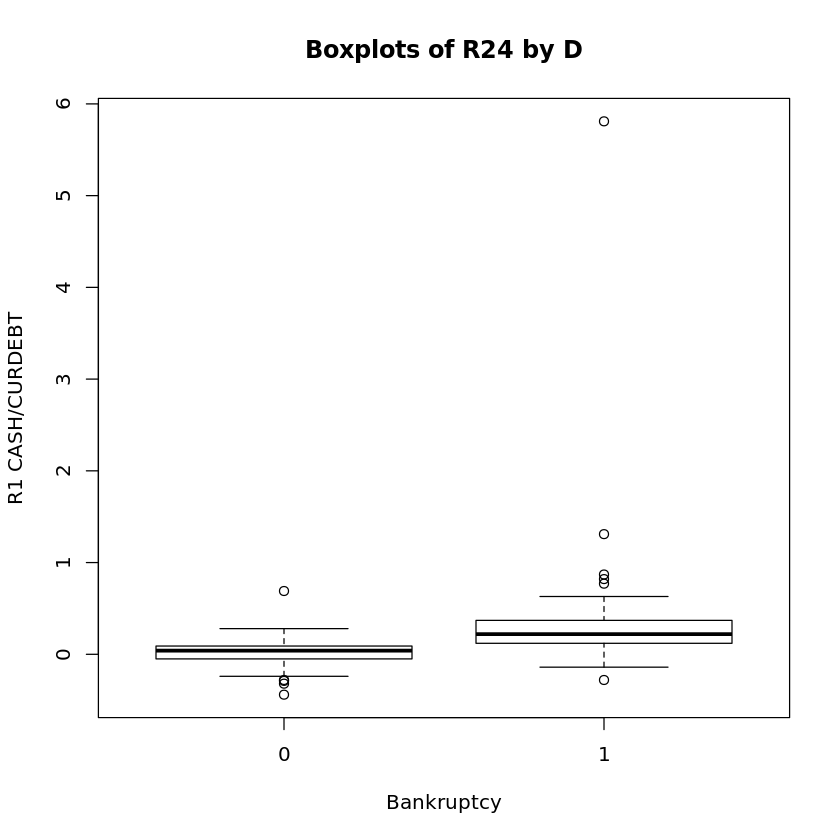

In [38]:
library(ggplot2)

# Create a box plots matrix of some of the columns, broken out by bankruptcy status 
boxplot(R1~D,data=bankrupt.df, main="Boxplots of R1 by D",xlab="Bankruptcy", ylab="R1 CASH/CURDEBT")
# etc etc
boxplot(R24~D,data=bankrupt.df, main="Boxplots of R24 by D",xlab="Bankruptcy", ylab="R1 CASH/CURDEBT")

In [39]:
#Checking for single-variable outliers 
test.df <- bankrupt.df
test.df$R1 <- scale(bankrupt.df$R1,center = TRUE, scale = TRUE)
test.df$R2 <- scale(bankrupt.df$R2,center = TRUE, scale = TRUE)
test.df$R3 <- scale(bankrupt.df$R3,center = TRUE, scale = TRUE)
test.df$R4 <- scale(bankrupt.df$R4,center = TRUE, scale = TRUE)
test.df$R5 <- scale(bankrupt.df$R5,center = TRUE, scale = TRUE)
test.df$R6 <- scale(bankrupt.df$R6,center = TRUE, scale = TRUE)
test.df$R7 <- scale(bankrupt.df$R7,center = TRUE, scale = TRUE)
test.df$R8 <- scale(bankrupt.df$R8,center = TRUE, scale = TRUE)
test.df$R9 <- scale(bankrupt.df$R9,center = TRUE, scale = TRUE)
test.df$R10 <- scale(bankrupt.df$R10,center = TRUE, scale = TRUE)
test.df$R11 <- scale(bankrupt.df$R11,center = TRUE, scale = TRUE)
test.df$R12 <- scale(bankrupt.df$R12,center = TRUE, scale = TRUE)
test.df$R13 <- scale(bankrupt.df$R13,center = TRUE, scale = TRUE)
test.df$R14 <- scale(bankrupt.df$R14,center = TRUE, scale = TRUE)
test.df$R15 <- scale(bankrupt.df$R15,center = TRUE, scale = TRUE)
test.df$R16 <- scale(bankrupt.df$R16,center = TRUE, scale = TRUE)
test.df$R17 <- scale(bankrupt.df$R17,center = TRUE, scale = TRUE)
test.df$R18 <- scale(bankrupt.df$R18,center = TRUE, scale = TRUE)
test.df$R19 <- scale(bankrupt.df$R19,center = TRUE, scale = TRUE)
test.df$R20 <- scale(bankrupt.df$R20,center = TRUE, scale = TRUE)
test.df$R21 <- scale(bankrupt.df$R21,center = TRUE, scale = TRUE)
test.df$R22 <- scale(bankrupt.df$R22,center = TRUE, scale = TRUE)
test.df$R23 <- scale(bankrupt.df$R23,center = TRUE, scale = TRUE)
test.df$R24 <- scale(bankrupt.df$R24,center = TRUE, scale = TRUE)   
summary(test.df)

# View is not supported in Jupyter R
# View(test.df)

       NO               D             YR               R1.V1       
 Min.   :  1.00   Min.   :0.0   Min.   :70.00   Min.   :-0.563326  
 1st Qu.: 33.75   1st Qu.:0.0   1st Qu.:72.00   1st Qu.:-0.428163  
 Median : 66.50   Median :0.5   Median :74.00   Median :-0.273691  
 Mean   : 66.50   Mean   :0.5   Mean   :74.02   Mean   : 0.000000  
 3rd Qu.: 99.25   3rd Qu.:1.0   3rd Qu.:76.00   3rd Qu.:-0.037155  
 Max.   :132.00   Max.   :1.0   Max.   :82.00   Max.   : 8.936709  
        R2.V1               R3.V1               R4.V1       
 Min.   :-0.494194   Min.   :-0.911803   Min.   :-0.735541  
 1st Qu.:-0.333123   1st Qu.:-0.541090   1st Qu.:-0.546739  
 Median :-0.252588   Median :-0.293949   Median :-0.357937  
 Mean   : 0.000000   Mean   : 0.000000   Mean   : 0.000000  
 3rd Qu.:-0.010982   3rd Qu.: 0.200334   3rd Qu.: 0.078668  
 Max.   : 7.559337   Max.   : 6.996727   Max.   : 5.778129  
        R5.V1               R6.V1               R7.V1       
 Min.   :-8.694115   Min.   :-5.7858

In [40]:
#Some variable cleanups
bankrupt.df$NO <- NULL #Strip column NO
bankrupt.df$YR <- NULL #Strip column YR
# Fortunate & awesome: D, the outcome variable, is now the first column
# Convert D to a factor as that seems to be needed for he function confusionMatrix to work
bankrupt.df$D=as.factor(bankrupt.df$D)   

In [41]:
#rescale (normalize)
library(scales)
# View(bankrupt.df)
bankrupt.df$R1 <- rescale(bankrupt.df$R1,to=c(0,1)) 
bankrupt.df$R2 <- rescale(bankrupt.df$R2,to=c(0,1)) 
bankrupt.df$R3 <- rescale(bankrupt.df$R3,to=c(0,1)) 
bankrupt.df$R4 <- rescale(bankrupt.df$R4,to=c(0,1)) 
bankrupt.df$R5 <- rescale(bankrupt.df$R5,to=c(0,1)) 
bankrupt.df$R6 <- rescale(bankrupt.df$R6,to=c(0,1)) 
bankrupt.df$R7 <- rescale(bankrupt.df$R7,to=c(0,1)) 
bankrupt.df$R8 <- rescale(bankrupt.df$R8,to=c(0,1)) 
bankrupt.df$R9 <- rescale(bankrupt.df$R9,to=c(0,1)) 
bankrupt.df$R10 <- rescale(bankrupt.df$R10,to=c(0,1)) 
bankrupt.df$R11 <- rescale(bankrupt.df$R11,to=c(0,1))
bankrupt.df$R12 <- rescale(bankrupt.df$R12,to=c(0,1)) 
bankrupt.df$R13 <- rescale(bankrupt.df$R13,to=c(0,1)) 
bankrupt.df$R14 <- rescale(bankrupt.df$R14,to=c(0,1)) 
bankrupt.df$R15 <- rescale(bankrupt.df$R15,to=c(0,1)) 
bankrupt.df$R16 <- rescale(bankrupt.df$R16,to=c(0,1)) 
bankrupt.df$R17 <- rescale(bankrupt.df$R17,to=c(0,1)) 
bankrupt.df$R18 <- rescale(bankrupt.df$R18,to=c(0,1)) 
bankrupt.df$R19 <- rescale(bankrupt.df$R19,to=c(0,1)) 
bankrupt.df$R20 <- rescale(bankrupt.df$R20,to=c(0,1)) 
bankrupt.df$R21 <- rescale(bankrupt.df$R21,to=c(0,1)) 
bankrupt.df$R22 <- rescale(bankrupt.df$R22,to=c(0,1)) 
bankrupt.df$R23 <- rescale(bankrupt.df$R23,to=c(0,1))
bankrupt.df$R24 <- rescale(bankrupt.df$R24,to=c(0,1)) 
summary(bankrupt.df) #check all mins and maxs are 0 and 1, respectively.

 D            R1                R2                R3                R4         
 0:66   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1:66   1st Qu.:0.01423   1st Qu.:0.02000   1st Qu.:0.04688   1st Qu.:0.02899  
        Median :0.03049   Median :0.03000   Median :0.07812   Median :0.05797  
        Mean   :0.05930   Mean   :0.06136   Mean   :0.11529   Mean   :0.11292  
        3rd Qu.:0.05539   3rd Qu.:0.06000   3rd Qu.:0.14062   3rd Qu.:0.12500  
        Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
       R5               R6               R7               R8         
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.7581   1st Qu.:0.5596   1st Qu.:0.3559   1st Qu.:0.02464  
 Median :0.7688   Median :0.6055   Median :0.3955   Median :0.03378  
 Mean   :0.7750   Mean   :0.5965   Mean   :0.4120   Mean   :0.07115  
 3rd Qu.:0.7957   3rd Qu.:0.6445   3rd Qu.:0.4633   3rd Qu.:0.05511  
 Max.   :1.0000   Ma

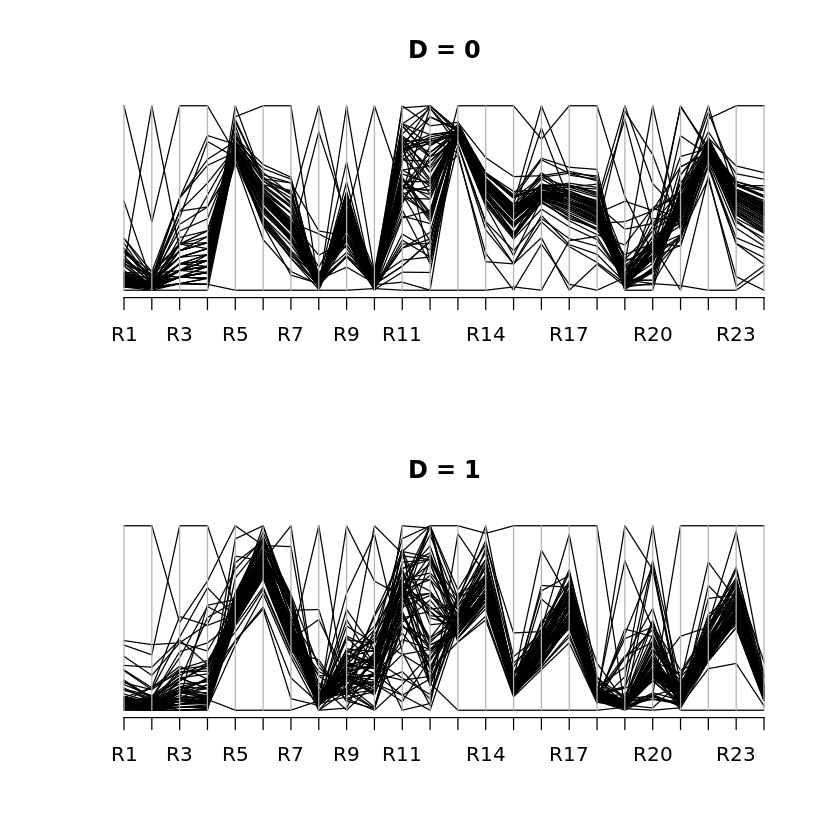

In [42]:
#Checking for multi-variable outliers using coordinate plot
#You will probably have to resize the plotting window, and have to use zoom.
library(MASS)
par(mfcol = c(2,1))
parcoord(bankrupt.df[bankrupt.df$D == 0,-1],main = "D = 0")
parcoord(bankrupt.df[bankrupt.df$D == 1,-1],main = "D = 1")

## Keep in mind, as you treat outliers, that you only have about 130 rows of data!

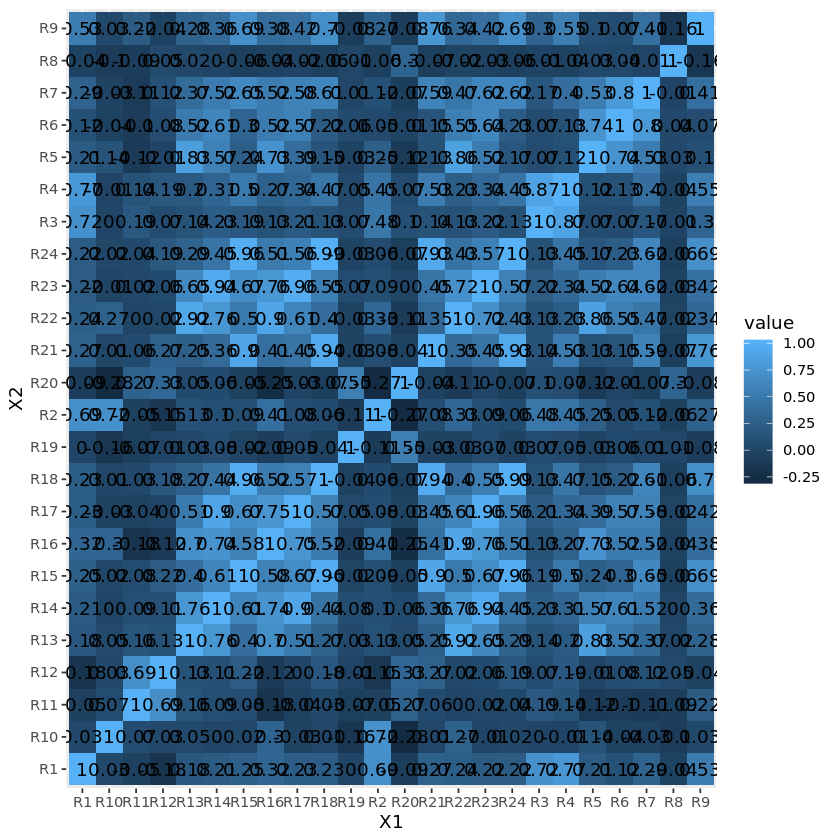

In [43]:
#Checking for highly correlated columns

# These installs happen as part of setting up the binder workspace (see install.R)
#install.packages("reshape")
#install.packages("tidyr")
library(reshape)
library(ggplot2)
cor.mat <- round(cor(bankrupt.df[,-1]),2)
melted.cor.mat <- melt(cor.mat)
ggplot(melted.cor.mat,aes(x=X1,y=X2,fill=value))+geom_tile() + geom_text(aes(x=X1,y=X2,label=value))
# Thought: several variables have correlations in the .9s, providing some guidance for thinning the variables.

In [44]:
# Based on correlation values
# Keep: R18, R22, R23
# Remove: R5, R13, R14, R15, R16, R17, R21, R24
bankrupt.df$R5 <- NULL
bankrupt.df$R13 <- NULL 
#bankrupt.df$R14 <- NULL 
bankrupt.df$R15 <- NULL 
bankrupt.df$R16 <- NULL 
bankrupt.df$R17 <- NULL 
#bankrupt.df$R21 <- NULL 
#bankrupt.df$R24 <- NULL
dim(bankrupt.df)  # find the dimension of data frame
colnames(bankrupt.df) # print column names
head(bankrupt.df)  # take a peak at the first six rows

[1] 132  20

[1] "D"   "R1"  "R2"  "R3"  "R4"  "R6"  "R7"  "R8"  "R9"  "R10" "R11" "R12"
[13] "R14" "R18" "R19" "R20" "R21" "R22" "R23" "R24"

D,R1,R2,R3,R4,R6,R7,R8,R9,R10,R11,R12,R14,R18,R19,R20,R21,R22,R23,R24
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.04674797,0.08,0.031250,0.02173913,0.6605505,0.4519774,0.09124538,0.09771987,0.02976190,0.04347826,0.0000000,0.6000000,0.10862620,0.01645123,0.02989537,0.06281228,0.9504950,0.5894737,0.0976
0,0.03861789,0.07,0.140625,0.08695652,0.5688073,0.3615819,0.02756738,0.15852334,0.04960317,0.78260870,0.5697674,0.6272727,0.10702875,0.01774383,0.18385650,0.05210564,0.7673267,0.5473684,0.0864
0,0.01422764,0.02,0.046875,0.03623188,0.6422018,0.4237288,0.02122600,0.11834962,0.03075397,0.65217391,0.6511628,0.5545455,0.07827476,0.07361927,0.23168909,0.05424697,0.7524752,0.5263158,0.0816
0,0.01422764,0.03,0.062500,0.02898551,0.6055046,0.3785311,0.04888145,0.09337676,0.03373016,0.56521739,0.5000000,0.5545455,0.07507987,0.02702703,0.18535127,0.03211991,0.7079208,0.3894737,0.0560
0,0.01829268,0.02,0.046875,0.02898551,0.6238532,0.4067797,0.02510129,0.17480999,0.03174603,0.60869565,0.3720930,0.5909091,0.09424920,0.04101058,0.21225710,0.05281941,0.7524752,0.5157895,0.0800
0,0.04878049,0.07,0.218750,0.15942029,0.7155963,0.5084746,0.02060948,0.11943540,0.03273810,0.79347826,0.9069767,0.6272727,0.10063898,0.05323149,0.26307922,0.06638116,0.7673267,0.5894737,0.0992


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


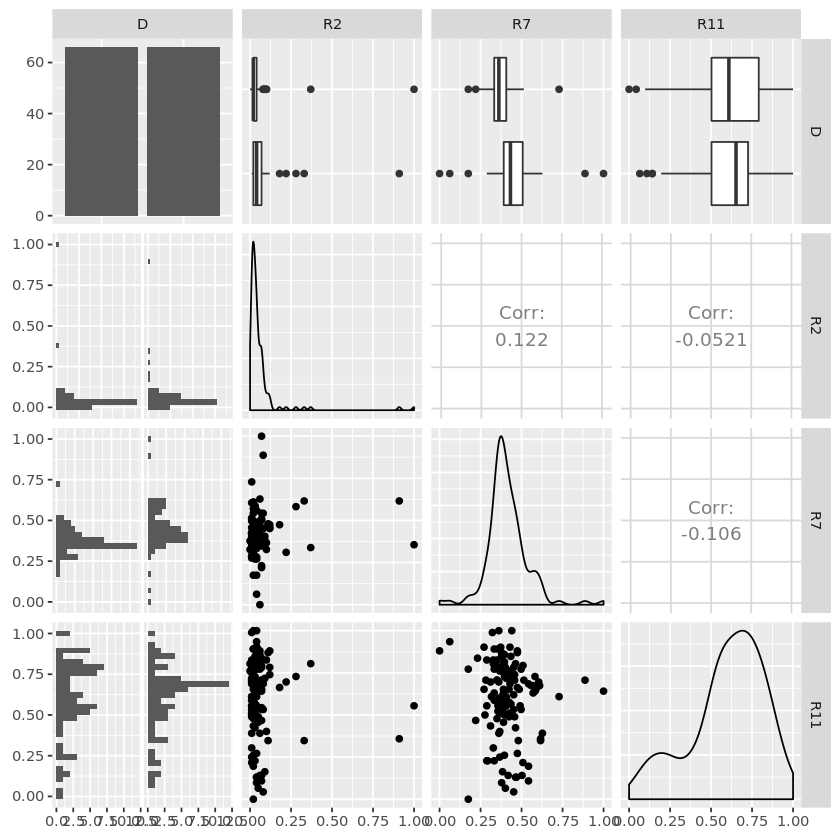

In [45]:
# Matrix scatterplots
# Suppose you want to produce a scatterplot matrix of D versus columns 3, 7, and 11
# install.packages("GGally")
library(ggplot2)
library(GGally)
ggpairs(bankrupt.df[,c(1,3,7,11)])

In [46]:
#Principal components analysis
pcs.cor <- prcomp(bankrupt.df[,-c(1,2)],scale. = T)
summary(pcs.cor)
# Looks like PC1 through PC7 picks up more than 88% of the cumulative variance
# Not going to use PCA since we care more explainability than performance
# bankrupt.df <- cbind(bankrupt.df[1:2],pcs.cor$x[,1:7])

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     2.4344 1.5164 1.4767 1.3700 1.22652 1.02435 1.00431
Proportion of Variance 0.3292 0.1277 0.1211 0.1043 0.08358 0.05829 0.05604
Cumulative Proportion  0.3292 0.4570 0.5781 0.6824 0.76599 0.82428 0.88032
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.89516 0.67016 0.5213 0.49856 0.40193 0.29752 0.23014
Proportion of Variance 0.04452 0.02495 0.0151 0.01381 0.00897 0.00492 0.00294
Cumulative Proportion  0.92484 0.94979 0.9649 0.97869 0.98767 0.99259 0.99553
                          PC15    PC16    PC17    PC18
Standard deviation     0.20038 0.16284 0.09046 0.07515
Proportion of Variance 0.00223 0.00147 0.00045 0.00031
Cumulative Proportion  0.99776 0.99923 0.99969 1.00000

In [47]:
#Partition into training and validation. Using a random partition of 60% for training, rest for validation
#Sample the data to get a training and validation data set
#Very thin data set. May have to stick to just two partitions.
set.seed(1)
training.rows <- sample(rownames(bankrupt.df),dim(bankrupt.df)[1]*0.6)
training <- bankrupt.df[training.rows,]
validate.rows <- setdiff(row.names(bankrupt.df),training.rows)
validate <- bankrupt.df[validate.rows,]
dim(training)
dim(validate)

[1] 79 20

[1] 53 20

# CART
- Simple CART model performs nearly as well on the validation set (.85) as it does on the training set (.87)
- Errors have slightly more FP
- R18 is a strong predictor

In [13]:
library(rpart)
library(rpart.plot)
library(caret)

# Draw Lift chart 
lift_chart <- function(model, validate, type, label) {
    probabilities <- predict(model,validate,type)
    if (type=="prob") {
        lift.data <- data.frame(validate[,1],probabilities[,2])
    } else {
        lift.data <- data.frame(validate[,1],probabilities)
    }
    
    colnames(lift.data) <- c("actual","prob")
    lift.model <- lift(relevel(as.factor(lift.data[,1]),ref="1")~prob,data=lift.data)
    print(xyplot(lift.model,plot="gain",main=label))
}

basic_tree <- function(training, validate, verbose=FALSE) {
    
    # Train the model
    default.ct <- rpart(D ~ .,data=training,method="class")
    
    # Classify records in validate using the tree
    default.ct.point.pred.train <- predict(default.ct,training,type="class")
    default.ct.point.pred.validate <- predict(default.ct,validate,type="class")

    if (verbose) {
        # Draw the tree
        prp(default.ct,type=1,extra=1,under=TRUE,split.font=1,varlen=-10)
        
        # Confustion Matrices for training and validate
        print(confusionMatrix(default.ct.point.pred.train,training$D))
        print(confusionMatrix(default.ct.point.pred.validate,validate$D))
    
        #Lift chart for default CART classifier
        lift_chart(default.ct, validate, "prob", "Default Tree Classifier")
    }
    
    return (default.ct)
}

Loading required package: lattice


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 31  7
         1  3 38
                                          
               Accuracy : 0.8734          
                 95% CI : (0.7795, 0.9376)
    No Information Rate : 0.5696          
    P-Value [Acc > NIR] : 5.26e-09        
                                          
                  Kappa : 0.7455          
                                          
 Mcnemar's Test P-Value : 0.3428          
                                          
            Sensitivity : 0.9118          
            Specificity : 0.8444          
         Pos Pred Value : 0.8158          
         Neg Pred Value : 0.9268          
             Prevalence : 0.4304          
         Detection Rate : 0.3924          
   Detection Prevalence : 0.4810          
      Balanced Accuracy : 0.8781          
                                          
       'Positive' Class : 0               
                                    

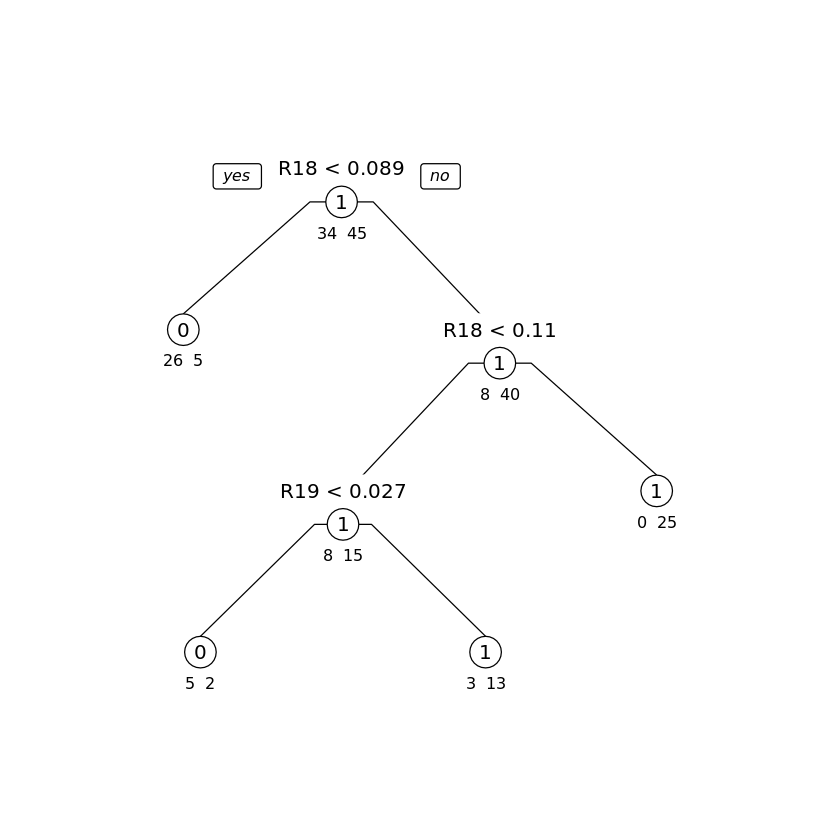

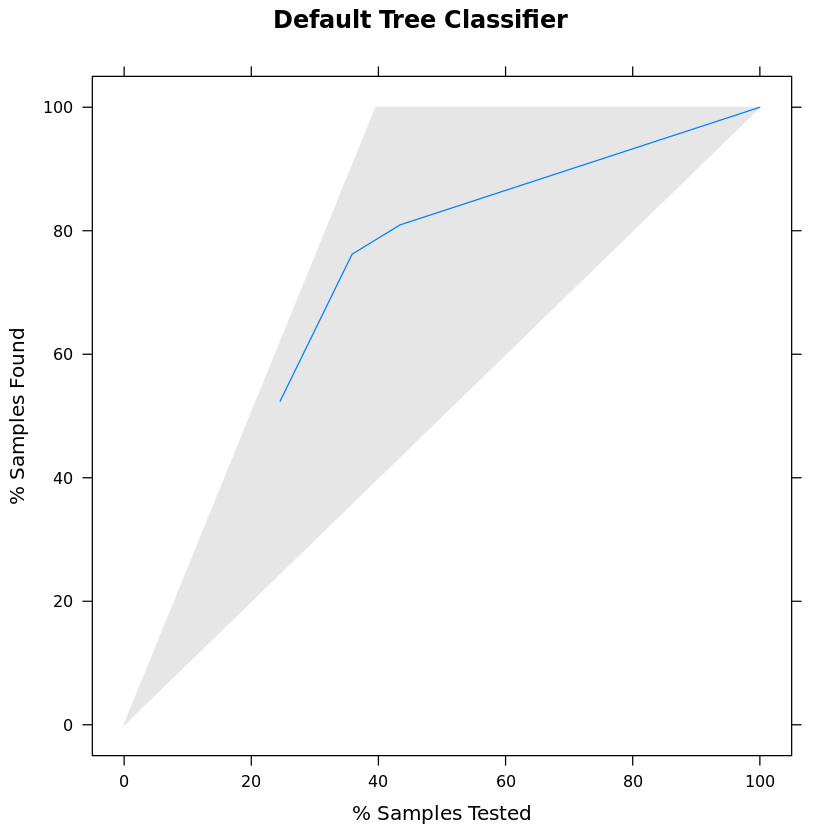

In [14]:
basic.ct = basic_tree(training, validate, verbose=TRUE)

# Pruned Tree
- Pruned tree performs even better on the validation set (.92) than on the training set (.88) 
- Both of which are improvements on the CART model
- R18 still a strong predictor, pruned tree also picked up R9 and R10

In [15]:
pruned_tree <- function(training, validate, df, cp=0.00001, verbose=FALSE) {
    #First tabulate error as a functon of the complexity parameter CP
    cv.ct <- rpart(D~.,data=df,method="class",cp=cp,minsplit=3,xval=5)

    # Now let's try a pruned tree (based upon Figure9.12)
    pruned.ct <- prune(cv.ct,cp=cv.ct$cptable[which.min(cv.ct$cptable[,"xerror"]),"CP"])
    length(pruned.ct$frame$var[pruned.ct$frame$var == "<leaf>"])
    
    #Now classify records in validate using the pruned tree
    pruned.ct.point.pred.train <- predict(pruned.ct,training,type="class")
    pruned.ct.point.pred.validate <- predict(pruned.ct,validate,type="class")
    
    if (verbose) {
        printcp(cv.ct)
        prp(pruned.ct,type=1,extra=1,split.font=1,varlen=-10)
        print(confusionMatrix(pruned.ct.point.pred.train,training$D))
        print(confusionMatrix(pruned.ct.point.pred.validate,validate$D))
        lift_chart(pruned.ct, validate, "prob", "Pruned Tree Classifier")
    }
    
    return (pruned.ct)
    
}


Classification tree:
rpart(formula = D ~ ., data = df, method = "class", cp = cp, 
    minsplit = 3, xval = 5)

Variables actually used in tree construction:
 [1] R1  R10 R11 R18 R2  R20 R21 R24 R3  R4  R6  R7  R8  R9 

Root node error: 66/132 = 0.5

n= 132 

         CP nsplit rel error  xerror     xstd
1 0.6818182      0  1.000000 1.12121 0.086397
2 0.0530303      1  0.318182 0.39394 0.069232
3 0.0303030      3  0.212121 0.36364 0.067141
4 0.0151515      5  0.151515 0.39394 0.069232
5 0.0050505     13  0.030303 0.42424 0.071165
6 0.0000100     16  0.015152 0.43939 0.072075
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 32  9
         1  2 36
                                          
               Accuracy : 0.8608          
                 95% CI : (0.7645, 0.9284)
    No Information Rate : 0.5696          
    P-Value [Acc > NIR] : 2.559e-08       
                                          
                  Kappa : 0.723           
            

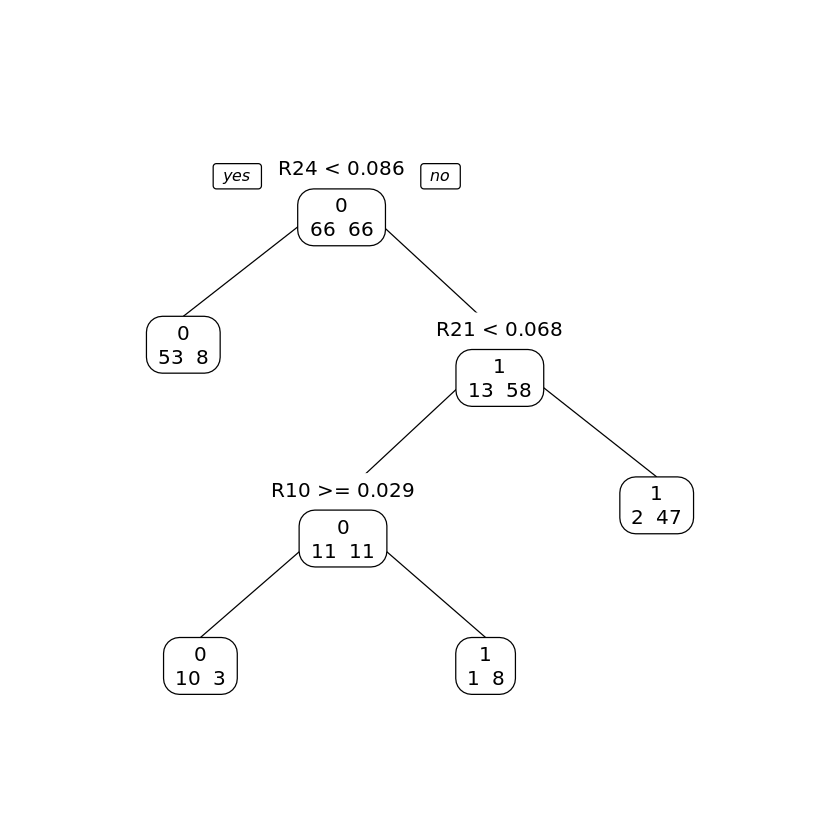

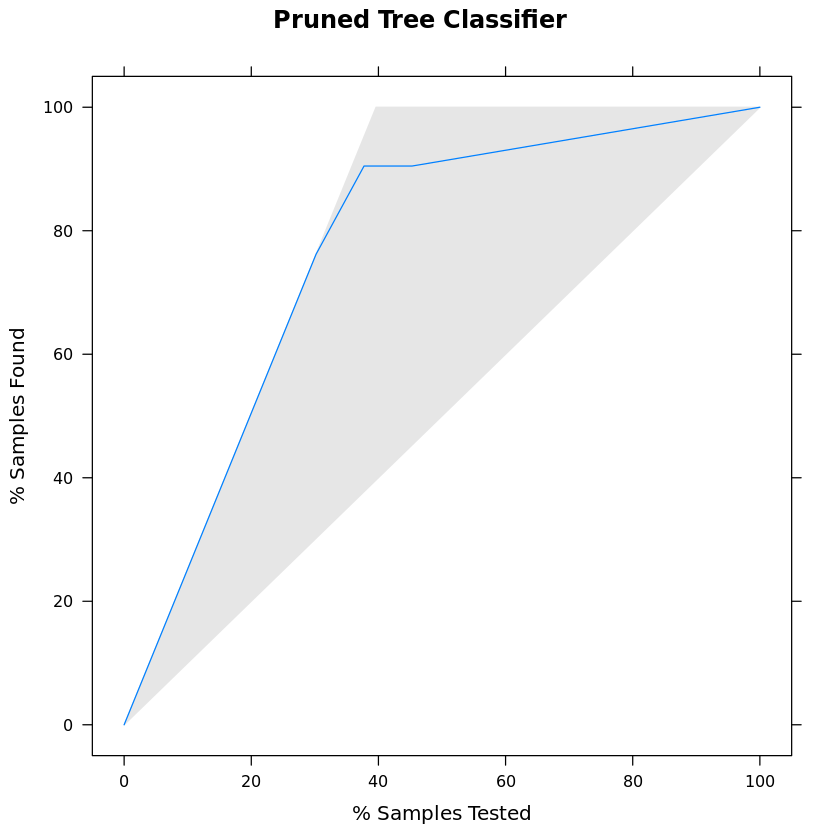

In [16]:
pruned.ct <- pruned_tree(training, validate, bankrupt.df, verbose=TRUE)

In [17]:
#Logistic regression classifier
library(gains)

logistic <- function(training, validate, cutoff=0.5, verbose=FALSE) {
    logit.reg <- glm(D~.,data=training,family="binomial")
    options(scipen=999)  # Turn off scientific notation
    pred <- predict(logit.reg,validate,type="response")
    
    if (verbose) {
        print(confusionMatrix(as.factor(ifelse(pred>cutoff,1,0)),validate$D))
        lift_chart(logit.reg, validate, "response", "Logistic Regression Classifier")
    }
    
    return (logit.reg)
}

In [18]:
# Test with 5 different values for the cutoff hyperparameter [0.1, 0.25, 0.5, 0.75, 0.9]
# Performance improves with higher cutoff values with .9 cutoff
# Accuracy of .85 is slightly below pruned tree
# Errors balanced between FP and FN
logit.reg <- logistic(training, validate)
pred <- predict(logit.reg,validate,type="response")
confusionMatrix(as.factor(ifelse(pred>0.1,1,0)),validate$D)
confusionMatrix(as.factor(ifelse(pred>0.25,1,0)),validate$D)
confusionMatrix(as.factor(ifelse(pred>0.5,1,0)),validate$D)
confusionMatrix(as.factor(ifelse(pred>0.75,1,0)),validate$D)
confusionMatrix(as.factor(ifelse(pred>0.9,1,0)),validate$D)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 18  2
         1 14 19
                                          
               Accuracy : 0.6981          
                 95% CI : (0.5566, 0.8166)
    No Information Rate : 0.6038          
    P-Value [Acc > NIR] : 0.10184         
                                          
                  Kappa : 0.4255          
                                          
 Mcnemar's Test P-Value : 0.00596         
                                          
            Sensitivity : 0.5625          
            Specificity : 0.9048          
         Pos Pred Value : 0.9000          
         Neg Pred Value : 0.5758          
             Prevalence : 0.6038          
         Detection Rate : 0.3396          
   Detection Prevalence : 0.3774          
      Balanced Accuracy : 0.7336          
                                          
       'Positive' Class : 0               
                                    

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 22  3
         1 10 18
                                          
               Accuracy : 0.7547          
                 95% CI : (0.6172, 0.8624)
    No Information Rate : 0.6038          
    P-Value [Acc > NIR] : 0.01557         
                                          
                  Kappa : 0.5151          
                                          
 Mcnemar's Test P-Value : 0.09609         
                                          
            Sensitivity : 0.6875          
            Specificity : 0.8571          
         Pos Pred Value : 0.8800          
         Neg Pred Value : 0.6429          
             Prevalence : 0.6038          
         Detection Rate : 0.4151          
   Detection Prevalence : 0.4717          
      Balanced Accuracy : 0.7723          
                                          
       'Positive' Class : 0               
                                    

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 25  3
         1  7 18
                                          
               Accuracy : 0.8113          
                 95% CI : (0.6803, 0.9056)
    No Information Rate : 0.6038          
    P-Value [Acc > NIR] : 0.001046        
                                          
                  Kappa : 0.6182          
                                          
 Mcnemar's Test P-Value : 0.342782        
                                          
            Sensitivity : 0.7812          
            Specificity : 0.8571          
         Pos Pred Value : 0.8929          
         Neg Pred Value : 0.7200          
             Prevalence : 0.6038          
         Detection Rate : 0.4717          
   Detection Prevalence : 0.5283          
      Balanced Accuracy : 0.8192          
                                          
       'Positive' Class : 0               
                                    

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 27  4
         1  5 17
                                         
               Accuracy : 0.8302         
                 95% CI : (0.702, 0.9193)
    No Information Rate : 0.6038         
    P-Value [Acc > NIR] : 0.0003429      
                                         
                  Kappa : 0.648          
                                         
 Mcnemar's Test P-Value : 1.0000000      
                                         
            Sensitivity : 0.8438         
            Specificity : 0.8095         
         Pos Pred Value : 0.8710         
         Neg Pred Value : 0.7727         
             Prevalence : 0.6038         
         Detection Rate : 0.5094         
   Detection Prevalence : 0.5849         
      Balanced Accuracy : 0.8266         
                                         
       'Positive' Class : 0              
                                         

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 28  4
         1  4 17
                                          
               Accuracy : 0.8491          
                 95% CI : (0.7241, 0.9325)
    No Information Rate : 0.6038          
    P-Value [Acc > NIR] : 0.00009934      
                                          
                  Kappa : 0.6845          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8750          
            Specificity : 0.8095          
         Pos Pred Value : 0.8750          
         Neg Pred Value : 0.8095          
             Prevalence : 0.6038          
         Detection Rate : 0.5283          
   Detection Prevalence : 0.6038          
      Balanced Accuracy : 0.8423          
                                          
       'Positive' Class : 0               
                                    

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 28  4
         1  4 17
                                          
               Accuracy : 0.8491          
                 95% CI : (0.7241, 0.9325)
    No Information Rate : 0.6038          
    P-Value [Acc > NIR] : 0.00009934      
                                          
                  Kappa : 0.6845          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8750          
            Specificity : 0.8095          
         Pos Pred Value : 0.8750          
         Neg Pred Value : 0.8095          
             Prevalence : 0.6038          
         Detection Rate : 0.5283          
   Detection Prevalence : 0.6038          
      Balanced Accuracy : 0.8423          
                                          
       'Positive' Class : 0               
                                    

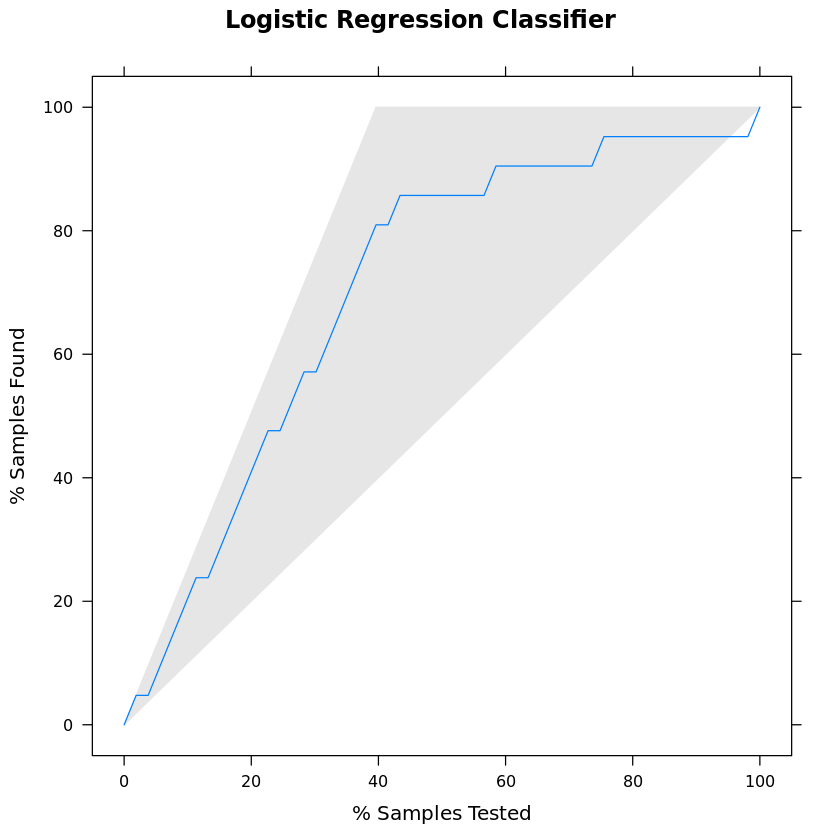

In [19]:
logit.reg <- logistic(training, validate, 0.9, TRUE)

# kNN
- Accuracy of 0.73 is much worse than the tree classifiers
- Most of the errors are FP

In [20]:
# kNN classifier
# I chose to implement the kNN classifier in the caret package because it optimizes for k
library(caret)

knn <- function(training, validate, verbose=FALSE) {
    trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
    set.seed(3333)
    knn_fit <- train(D ~.,data = training,method = "knn",
                 trControl=trctrl,
                 preProcess = c("center", "scale"),
                 tuneLength = 10)
    
    if (verbose) {
        # The next command shows the tabulated values of k and the optimal value of k
        print(knn_fit)
        
        # Now examine confusion matrix
        test_pred <- predict(knn_fit, newdata = validate)
        print(confusionMatrix(test_pred,validate$D))
        lift_chart(knn_fit, validate, "prob", "kNN Classifier")
    }
    
    return (knn_fit)
}

k-Nearest Neighbors 

79 samples
18 predictors
 2 classes: '0', '1' 

Pre-processing: centered (18), scaled (18) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 71, 71, 71, 72, 71, 71, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.6707672  0.3189837
   7  0.7094577  0.4011359
   9  0.6886243  0.3554015
  11  0.6972884  0.3633161
  13  0.7189815  0.4110316
  15  0.7283730  0.4297799
  17  0.7257275  0.4215289
  19  0.7160714  0.4102432
  21  0.7133598  0.4030353
  23  0.7087302  0.3975390

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 15.
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 21  3
         1 11 18
                                          
               Accuracy : 0.7358          
                 95% CI : (0.5967, 0.8474)
    No Information Rate : 0.6038          
    P-Value [Acc > NIR] : 0.03165    

k-Nearest Neighbors 

79 samples
18 predictors
 2 classes: '0', '1' 

Pre-processing: centered (18), scaled (18) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 71, 71, 71, 72, 71, 71, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.6707672  0.3189837
   7  0.7094577  0.4011359
   9  0.6886243  0.3554015
  11  0.6972884  0.3633161
  13  0.7189815  0.4110316
  15  0.7283730  0.4297799
  17  0.7257275  0.4215289
  19  0.7160714  0.4102432
  21  0.7133598  0.4030353
  23  0.7087302  0.3975390

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 15.

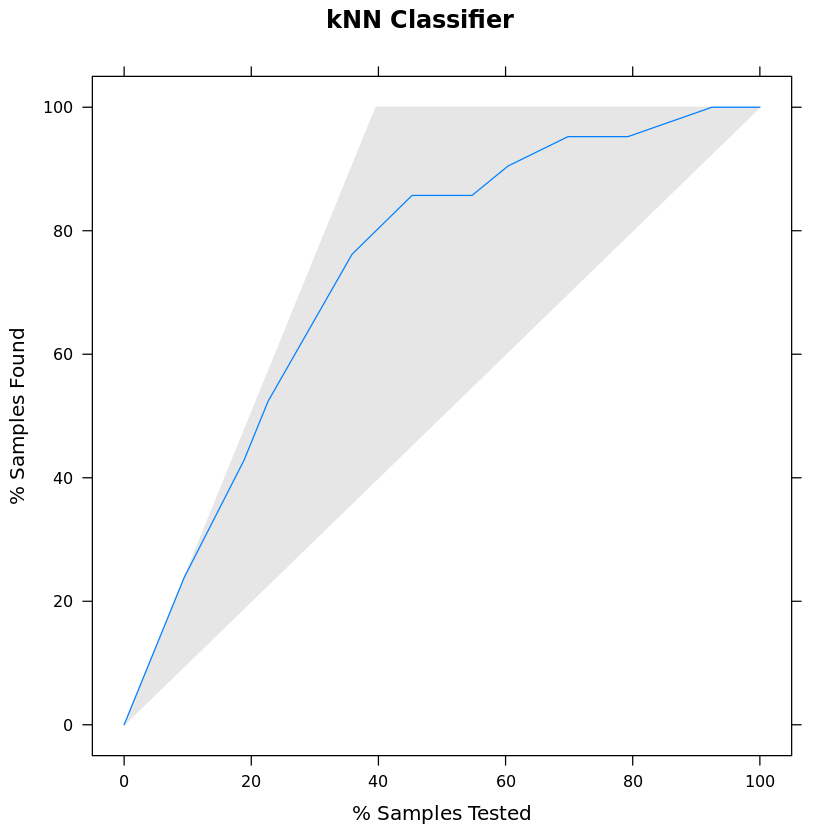

In [21]:
knn(training, validate, verbose=TRUE)

# Random Forest
- Accuracy of 0.83 is slightly below the logistic regression and pruned tree
- Most of the errors are FP
- Predictive Features: R18, R23, R7, R9, R22

In [22]:
#Random Forest
library(randomForest)

rf <- function(training, validate, verbose=FALSE) {
    rf.model <- randomForest(D~.,data=training,ntree=500,mtry=4,nodeize=5,importance=TRUE,norm.votes=TRUE)
    
    if (verbose) {
        varImpPlot(rf.model,type=1)
        rf.pred <- predict(rf.model,validate)
        print(confusionMatrix(rf.pred,validate$D))
        lift_chart(rf.model, validate, "prob", "Random Forest")
    }
    
    return (rf.model)
}

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 26  2
         1  6 19
                                          
               Accuracy : 0.8491          
                 95% CI : (0.7241, 0.9325)
    No Information Rate : 0.6038          
    P-Value [Acc > NIR] : 0.00009934      
                                          
                  Kappa : 0.6945          
                                          
 Mcnemar's Test P-Value : 0.2888          
                                          
            Sensitivity : 0.8125          
            Specificity : 0.9048          
         Pos Pred Value : 0.9286          
         Neg Pred Value : 0.7600          
             Prevalence : 0.6038          
         Detection Rate : 0.4906          
   Detection Prevalence : 0.5283          
      Balanced Accuracy : 0.8586          
                                          
       'Positive' Class : 0               
                                    

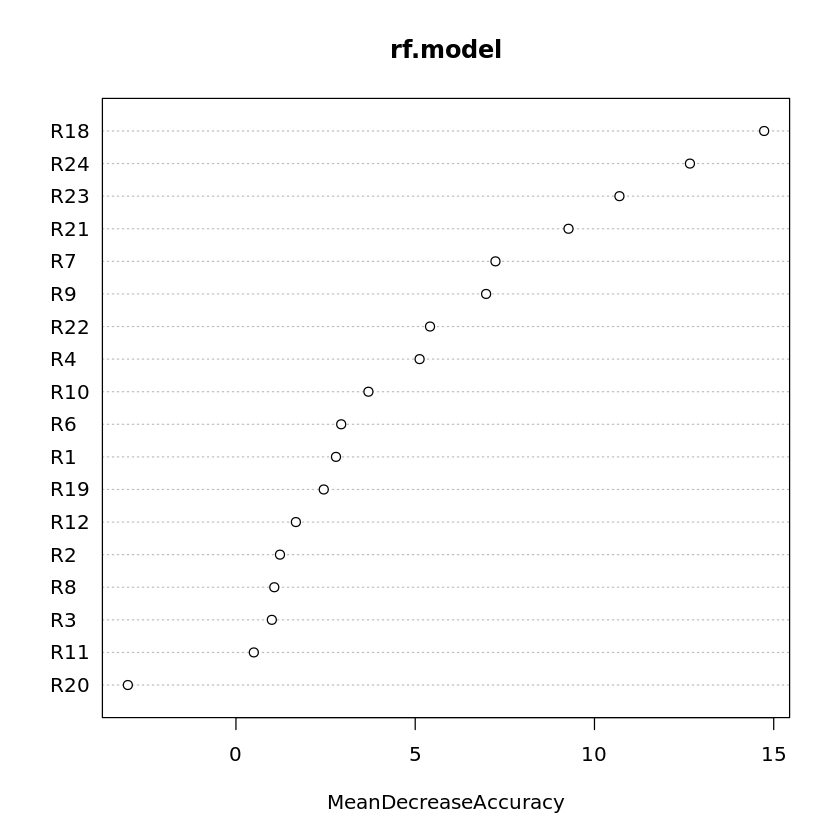


Call:
 randomForest(formula = D ~ ., data = training, ntree = 500, mtry = 4,      nodeize = 5, importance = TRUE, norm.votes = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 21.52%
Confusion matrix:
   0  1 class.error
0 26  8   0.2352941
1  9 36   0.2000000

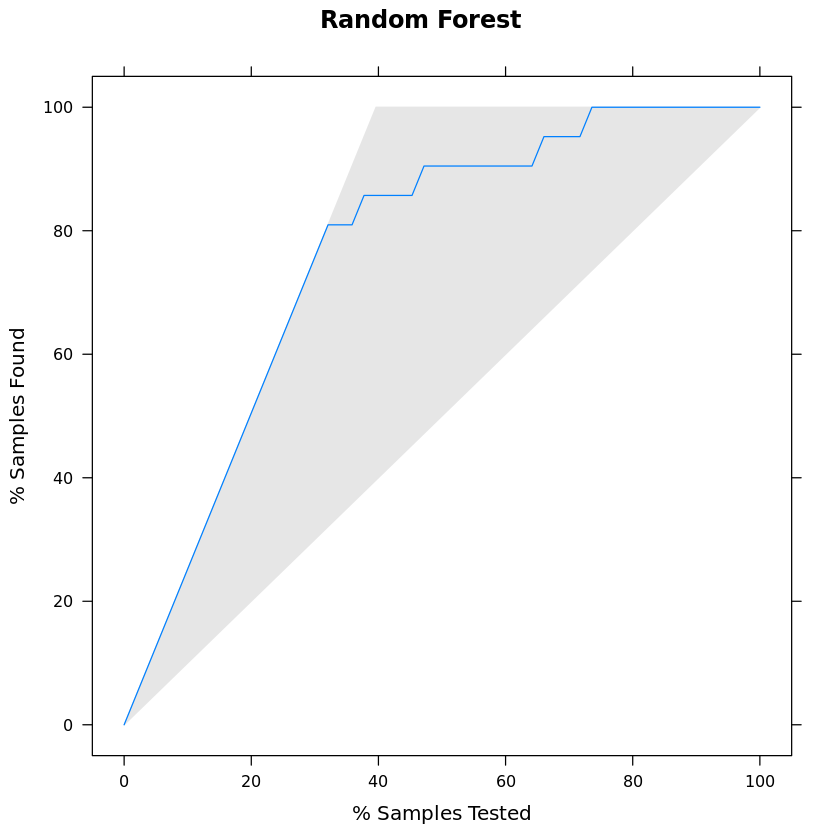

In [23]:
rf(training, validate, verbose=TRUE)

# Boost
- Accuracy of 0.83 is slightly below the logistic regression and pruned tree
- Errors are mostly FP

In [24]:
# Boost algorithm
library(adabag)
library(rpart)
library(caret)

boost <- function(training, validate, verbose=FALSE) {
    boost.model <- boosting(D~.,data=training)
    
    if (verbose) {
        pred<-predict(boost.model,validate)
        print(confusionMatrix(as.factor(pred$class),validate$D))
        pred <- predict(boost.model,validate,type="prob")
        lift.data <- data.frame(validate[,1],pred$prob[,2])
        colnames(lift.data) <- c("actual","prob")
        lift.logit <- lift(relevel(as.factor(lift.data[,1]),ref="1")~prob,data=lift.data)
        print(xyplot(lift.logit,label="gain",main="Boost Classifier"))
    }
    
    return (boost.model)
   
}

Loading required package: foreach
Loading required package: doParallel
Loading required package: iterators
Loading required package: parallel


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 26  3
         1  6 18
                                         
               Accuracy : 0.8302         
                 95% CI : (0.702, 0.9193)
    No Information Rate : 0.6038         
    P-Value [Acc > NIR] : 0.0003429      
                                         
                  Kappa : 0.6536         
                                         
 Mcnemar's Test P-Value : 0.5049851      
                                         
            Sensitivity : 0.8125         
            Specificity : 0.8571         
         Pos Pred Value : 0.8966         
         Neg Pred Value : 0.7500         
             Prevalence : 0.6038         
         Detection Rate : 0.4906         
   Detection Prevalence : 0.5472         
      Balanced Accuracy : 0.8348         
                                         
       'Positive' Class : 0              
                                         


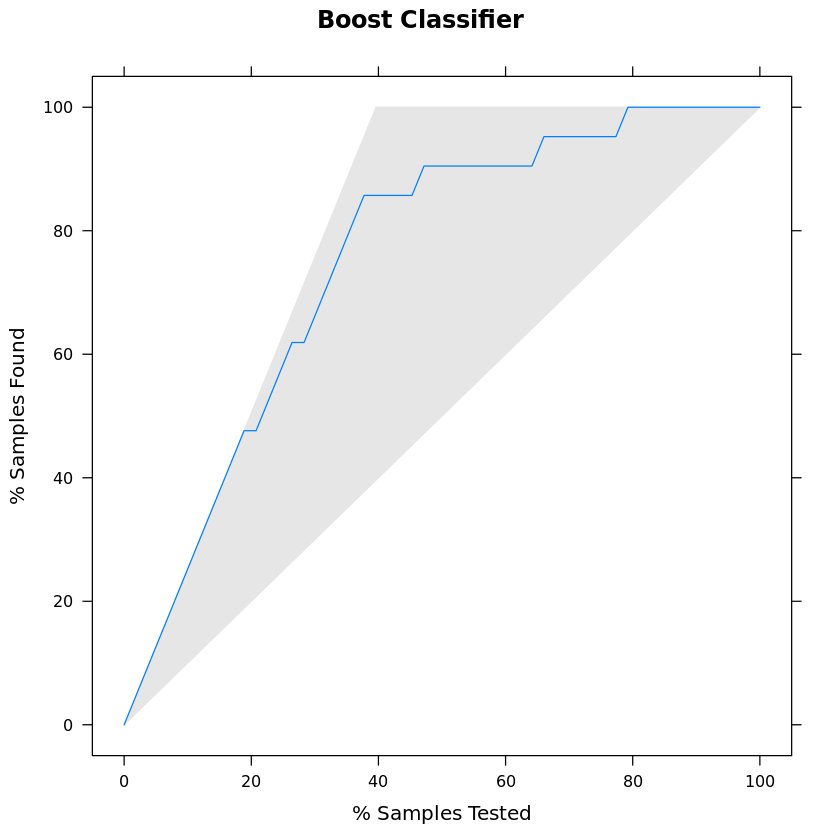

In [25]:
boost.model <- boost(training, validate, verbose=TRUE)

# XGBoost
- Accuracy is average at 0.79
- Errors are mostly FN (different from other models)

In [26]:
#XGBoost (Extreme Gradient Boosting) is a boosting algorithm based on 
#Gradient Boosting Machines.  XGboost applies regularization technique 
#to reduce overfitting, and it is one of the differences from the gradient 
# boosting. Another advantage of XGBoost over classical gradient boosting 
#is that it is fast in execution speed.
library(xgboost)

xgboost_train <- function(training, validate, verbose=FALSE) {
    #Note, the training x data should be matrix type to use in xgboost model.
    train_x <- data.matrix(training[,-1])
    train_y <- training[,1]
    test_x <- data.matrix(validate[,-1])
    test_y <- validate[,1]
    #Note that column 1 is the D variable 
    #Next, we need to convert the train and test data into xgb matrix type.
    xgb_train <- xgb.DMatrix(data=train_x, label=train_y)
    xgb_test <- xgb.DMatrix(data=test_x, label=test_y)
    xgbc <- xgboost(data=xgb_train, max.depth=6, nrounds=50) # Model building step
    
    if (verbose) {
        pred <- predict(xgbc, xgb_test)
        pred_y = as.factor((levels(test_y))[round(pred)])
        print(confusionMatrix(test_y, pred_y))
        
        probabilities <- predict(xgbc,xgb_test,objective="multi:softprob")
        lift.data <- data.frame(validate[,1],probabilities)
        colnames(lift.data) <- c("actual","prob")
        lift.xgboost <- lift(relevel(as.factor(lift.data[,1]),ref="1")~prob,data=lift.data)
        print(xyplot(lift.xgboost,plot="gain",main="XGBoost Classifier"))
        # The lift chart plot appears to be glitchy
    }
    
    return (xgbc)
}

[1]	train-rmse:0.863821 
[2]	train-rmse:0.633070 
[3]	train-rmse:0.463982 
[4]	train-rmse:0.337550 
[5]	train-rmse:0.248096 
[6]	train-rmse:0.184782 
[7]	train-rmse:0.139087 
[8]	train-rmse:0.105659 
[9]	train-rmse:0.081878 
[10]	train-rmse:0.065540 
[11]	train-rmse:0.052998 
[12]	train-rmse:0.042872 
[13]	train-rmse:0.035255 
[14]	train-rmse:0.030136 
[15]	train-rmse:0.024434 
[16]	train-rmse:0.020335 
[17]	train-rmse:0.016993 
[18]	train-rmse:0.013861 
[19]	train-rmse:0.011061 
[20]	train-rmse:0.008914 
[21]	train-rmse:0.007175 
[22]	train-rmse:0.005767 
[23]	train-rmse:0.004729 
[24]	train-rmse:0.003888 
[25]	train-rmse:0.003285 
[26]	train-rmse:0.002738 
[27]	train-rmse:0.002290 
[28]	train-rmse:0.001870 
[29]	train-rmse:0.001586 
[30]	train-rmse:0.001308 
[31]	train-rmse:0.001096 
[32]	train-rmse:0.000917 
[33]	train-rmse:0.000801 
[34]	train-rmse:0.000684 
[35]	train-rmse:0.000681 
[36]	train-rmse:0.000679 
[37]	train-rmse:0.000678 
[38]	train-rmse:0.000677 
[39]	train-rmse:0.000

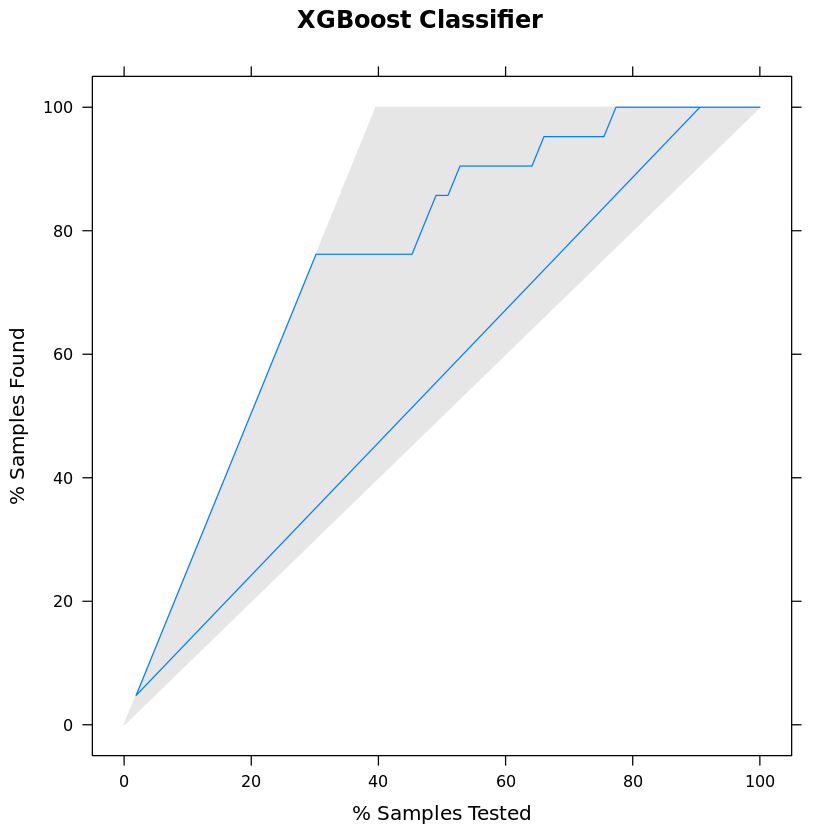

In [27]:
xgbc <- xgboost_train(training, validate, verbose=TRUE)

In [28]:
run_models <- function(df, verbose=FALSE) {
    
    # Partition training and validate data
    set.seed(42)
    training.rows <- sample(rownames(df),dim(df)[1]*0.6)
    training <- df[training.rows,]
    validate.rows <- setdiff(row.names(df),training.rows)
    validate <- df[validate.rows,]
    
    # Basic Tree
    print("Basic Tree")
    basic.tree <- basic_tree(training, validate, verbose=verbose)
    if (!verbose) {
        basic.tree.pred <- predict(basic.tree,validate,type="class")
        print(confusionMatrix(basic.tree.pred, validate$D))
    }
    
    # Pruned Tree
    print("Pruned Tree")
    pruned.tree <- pruned_tree(training, validate, df, verbose=verbose)
    if (!verbose) {
        pruned.tree.pred <- predict(pruned.tree,validate,type="class")
        print(confusionMatrix(pruned.tree.pred, validate$D))
    }
    
    # Logistic Regression
    print("Logistic Regression")
    logit.reg = logistic(training, validate, verbose=verbose)
    if (!verbose) {
        logit.reg.pred <- predict(logit.reg,validate,type="response")
        print(confusionMatrix(as.factor(ifelse(logit.reg.pred>0.5,1,0)),validate$D))
    }
    
     
    # kNN
    print("kNN")
    knn.fit = knn(training, validate, verbose=verbose)
    if (!verbose) {
        knn.fit.pred <- predict(knn.fit, newdata = validate)
        print(confusionMatrix(knn.fit.pred,validate$D))
    }

    # Random Forest
    print("Random Forest")
    rf.model = rf(training, validate, verbose=verbose)
    if (!verbose) {    
        rf.model.pred <- predict(rf.model,validate)
        print(confusionMatrix(rf.model.pred,validate$D))
    }

    # Boost
    print("Boost")
    boost.model = boost(training, validate, verbose=verbose)
    if (!verbose) {
        boost.model.pred<-predict(boost.model,validate)
        print(confusionMatrix(as.factor(boost.model.pred$class),validate$D))
    }

    # XGBoost
    print("XGBoost")
    xgbc = xgboost_train(training, validate, verbose=verbose)    
}

In [29]:
# Given the very small number of records, let's only keep the most predictive features
# Based on the initial classification trees and random forest
# R18, R23, R7, R22, R19
run_models(bankrupt.df[c("D","R7", "R18", "R19", "R22", "R23")])

[1] "Basic Tree"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 17  5
         1 11 20
                                          
               Accuracy : 0.6981          
                 95% CI : (0.5566, 0.8166)
    No Information Rate : 0.5283          
    P-Value [Acc > NIR] : 0.008932        
                                          
                  Kappa : 0.402           
                                          
 Mcnemar's Test P-Value : 0.211300        
                                          
            Sensitivity : 0.6071          
            Specificity : 0.8000          
         Pos Pred Value : 0.7727          
         Neg Pred Value : 0.6452          
             Prevalence : 0.5283          
         Detection Rate : 0.3208          
   Detection Prevalence : 0.4151          
      Balanced Accuracy : 0.7036          
                                          
       'Positive' Class : 0               
                   

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 23 11
         1  5 14
                                          
               Accuracy : 0.6981          
                 95% CI : (0.5566, 0.8166)
    No Information Rate : 0.5283          
    P-Value [Acc > NIR] : 0.008932        
                                          
                  Kappa : 0.3864          
                                          
 Mcnemar's Test P-Value : 0.211300        
                                          
            Sensitivity : 0.8214          
            Specificity : 0.5600          
         Pos Pred Value : 0.6765          
         Neg Pred Value : 0.7368          
             Prevalence : 0.5283          
         Detection Rate : 0.4340          
   Detection Prevalence : 0.6415          
      Balanced Accuracy : 0.6907          
                                          
       'Positive' Class : 0               
                                    

In [30]:
# Top 9 features
run_models(bankrupt.df[c("D","R7", "R8", "R9", "R10", "R11", "R18", "R19", "R22", "R23")])

[1] "Basic Tree"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 17  5
         1 11 20
                                          
               Accuracy : 0.6981          
                 95% CI : (0.5566, 0.8166)
    No Information Rate : 0.5283          
    P-Value [Acc > NIR] : 0.008932        
                                          
                  Kappa : 0.402           
                                          
 Mcnemar's Test P-Value : 0.211300        
                                          
            Sensitivity : 0.6071          
            Specificity : 0.8000          
         Pos Pred Value : 0.7727          
         Neg Pred Value : 0.6452          
             Prevalence : 0.5283          
         Detection Rate : 0.3208          
   Detection Prevalence : 0.4151          
      Balanced Accuracy : 0.7036          
                                          
       'Positive' Class : 0               
                   

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 24 10
         1  4 15
                                          
               Accuracy : 0.7358          
                 95% CI : (0.5967, 0.8474)
    No Information Rate : 0.5283          
    P-Value [Acc > NIR] : 0.00161         
                                          
                  Kappa : 0.4631          
                                          
 Mcnemar's Test P-Value : 0.18145         
                                          
            Sensitivity : 0.8571          
            Specificity : 0.6000          
         Pos Pred Value : 0.7059          
         Neg Pred Value : 0.7895          
             Prevalence : 0.5283          
         Detection Rate : 0.4528          
   Detection Prevalence : 0.6415          
      Balanced Accuracy : 0.7286          
                                          
       'Positive' Class : 0               
                                    

In [31]:
# PCA top 5
run_models(cbind(bankrupt.df[1:2],pcs.cor$x[,1:5]))

[1] "Basic Tree"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 18  3
         1 10 22
                                          
               Accuracy : 0.7547          
                 95% CI : (0.6172, 0.8624)
    No Information Rate : 0.5283          
    P-Value [Acc > NIR] : 0.000599        
                                          
                  Kappa : 0.5151          
                                          
 Mcnemar's Test P-Value : 0.096092        
                                          
            Sensitivity : 0.6429          
            Specificity : 0.8800          
         Pos Pred Value : 0.8571          
         Neg Pred Value : 0.6875          
             Prevalence : 0.5283          
         Detection Rate : 0.3396          
   Detection Prevalence : 0.3962          
      Balanced Accuracy : 0.7614          
                                          
       'Positive' Class : 0               
                   

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 22  8
         1  6 17
                                          
               Accuracy : 0.7358          
                 95% CI : (0.5967, 0.8474)
    No Information Rate : 0.5283          
    P-Value [Acc > NIR] : 0.00161         
                                          
                  Kappa : 0.4677          
                                          
 Mcnemar's Test P-Value : 0.78927         
                                          
            Sensitivity : 0.7857          
            Specificity : 0.6800          
         Pos Pred Value : 0.7333          
         Neg Pred Value : 0.7391          
             Prevalence : 0.5283          
         Detection Rate : 0.4151          
   Detection Prevalence : 0.5660          
      Balanced Accuracy : 0.7329          
                                          
       'Positive' Class : 0               
                                    

In [32]:
# PCA top 9
run_models(cbind(bankrupt.df[1:2],pcs.cor$x[,1:9]))

[1] "Basic Tree"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 18  3
         1 10 22
                                          
               Accuracy : 0.7547          
                 95% CI : (0.6172, 0.8624)
    No Information Rate : 0.5283          
    P-Value [Acc > NIR] : 0.000599        
                                          
                  Kappa : 0.5151          
                                          
 Mcnemar's Test P-Value : 0.096092        
                                          
            Sensitivity : 0.6429          
            Specificity : 0.8800          
         Pos Pred Value : 0.8571          
         Neg Pred Value : 0.6875          
             Prevalence : 0.5283          
         Detection Rate : 0.3396          
   Detection Prevalence : 0.3962          
      Balanced Accuracy : 0.7614          
                                          
       'Positive' Class : 0               
                   

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 24 10
         1  4 15
                                          
               Accuracy : 0.7358          
                 95% CI : (0.5967, 0.8474)
    No Information Rate : 0.5283          
    P-Value [Acc > NIR] : 0.00161         
                                          
                  Kappa : 0.4631          
                                          
 Mcnemar's Test P-Value : 0.18145         
                                          
            Sensitivity : 0.8571          
            Specificity : 0.6000          
         Pos Pred Value : 0.7059          
         Neg Pred Value : 0.7895          
             Prevalence : 0.5283          
         Detection Rate : 0.4528          
   Detection Prevalence : 0.6415          
      Balanced Accuracy : 0.7286          
                                          
       'Positive' Class : 0               
                                    

[1] "Basic Tree"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 34  2
         1  4 28
                                          
               Accuracy : 0.9118          
                 95% CI : (0.8178, 0.9669)
    No Information Rate : 0.5588          
    P-Value [Acc > NIR] : 0.0000000001961 
                                          
                  Kappa : 0.8223          
                                          
 Mcnemar's Test P-Value : 0.6831          
                                          
            Sensitivity : 0.8947          
            Specificity : 0.9333          
         Pos Pred Value : 0.9444          
         Neg Pred Value : 0.8750          
             Prevalence : 0.5588          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.5294          
      Balanced Accuracy : 0.9140          
                                          
       'Positive' Class : 0               
                   

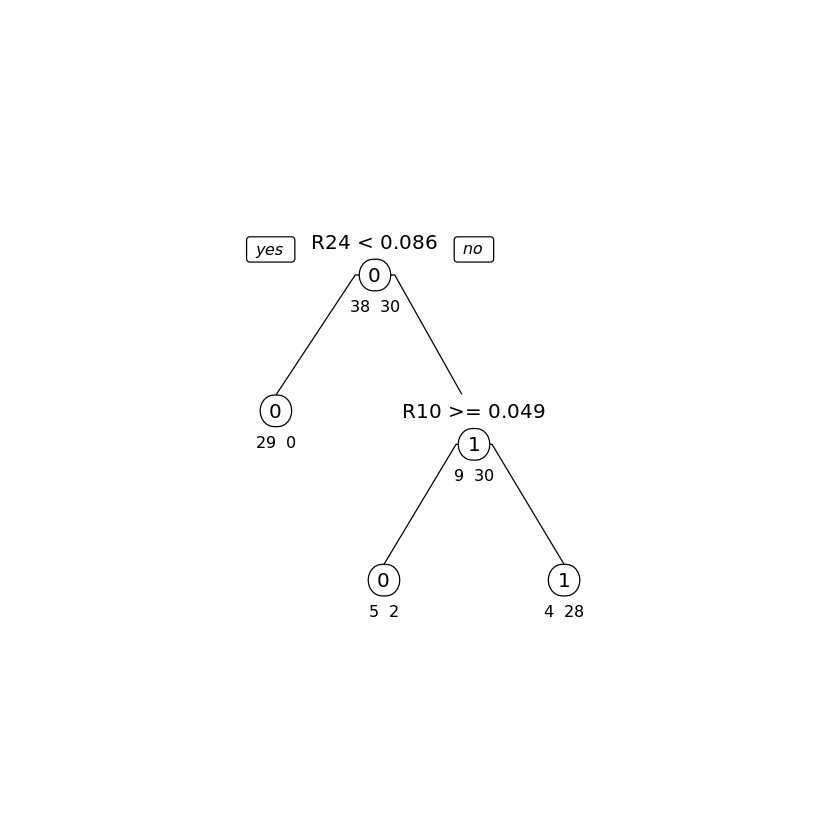

[1] "Pruned Tree"

Classification tree:
rpart(formula = D ~ ., data = df, method = "class", cp = cp, 
    minsplit = 3, xval = 5)

Variables actually used in tree construction:
[1] R1  R10 R11 R18 R19 R2  R24 R7  R8 

Root node error: 53/114 = 0.46491

n= 114 

        CP nsplit rel error  xerror     xstd
1 0.679245      0  1.000000 1.00000 0.100479
2 0.056604      1  0.320755 0.35849 0.075078
3 0.037736      2  0.264151 0.39623 0.078095
4 0.018868      6  0.113208 0.37736 0.076621
5 0.009434      9  0.056604 0.43396 0.080846
6 0.000010     11  0.037736 0.50943 0.085647


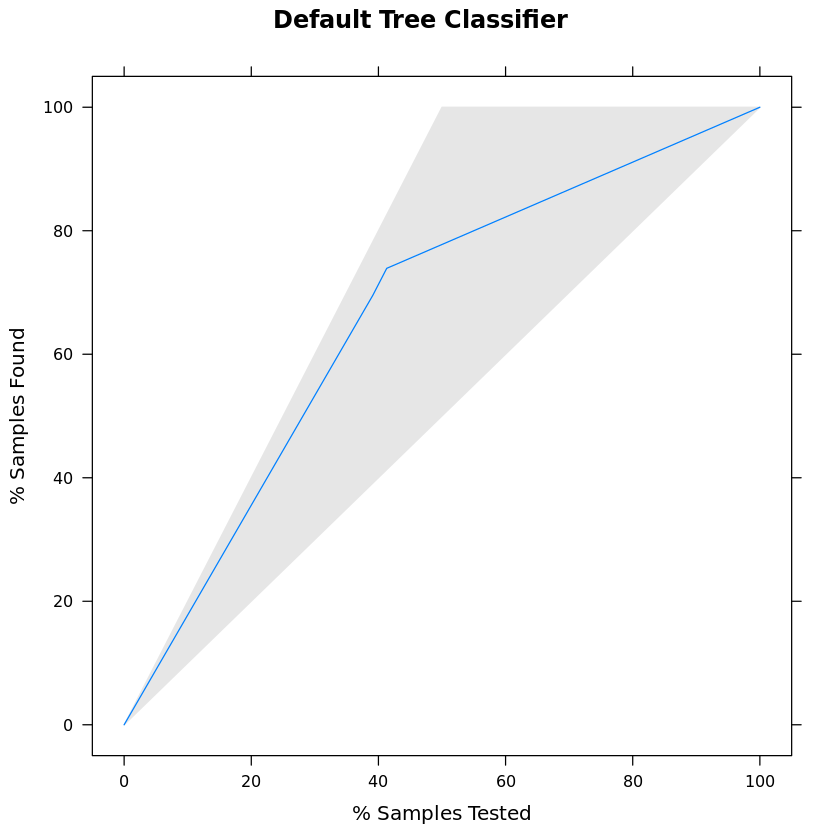

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 29  0
         1  9 30
                                          
               Accuracy : 0.8676          
                 95% CI : (0.7636, 0.9377)
    No Information Rate : 0.5588          
    P-Value [Acc > NIR] : 0.000000047     
                                          
                  Kappa : 0.7398          
                                          
 Mcnemar's Test P-Value : 0.007661        
                                          
            Sensitivity : 0.7632          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.7692          
             Prevalence : 0.5588          
         Detection Rate : 0.4265          
   Detection Prevalence : 0.4265          
      Balanced Accuracy : 0.8816          
                                          
       'Positive' Class : 0               
                                    

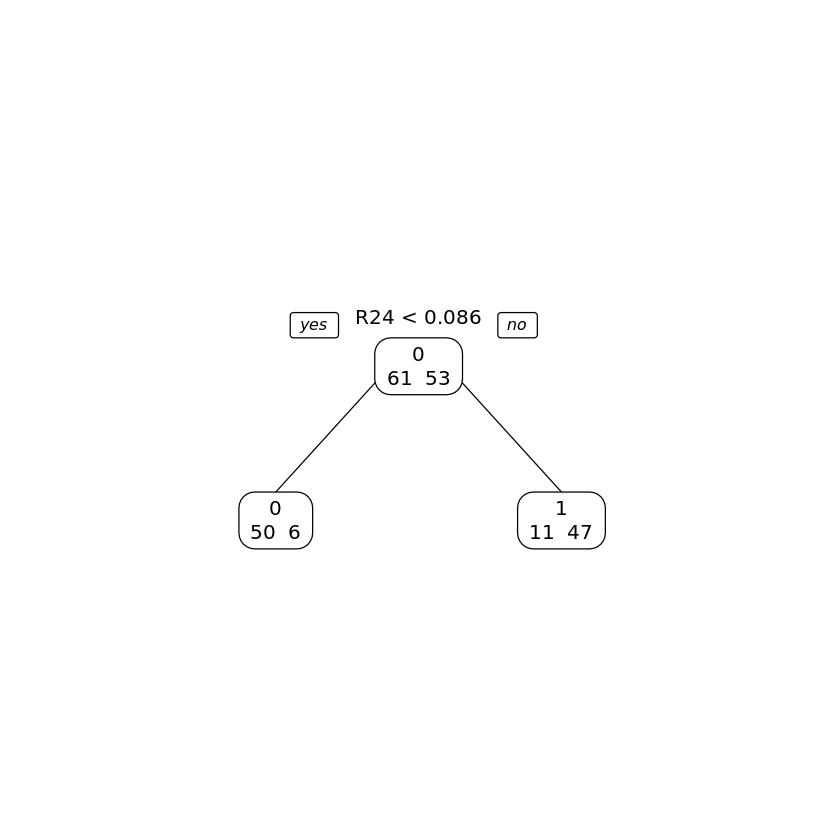

[1] "Logistic Regression"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 19  8
         1  4 15
                                          
               Accuracy : 0.7391          
                 95% CI : (0.5887, 0.8573)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.0008207       
                                          
                  Kappa : 0.4783          
                                          
 Mcnemar's Test P-Value : 0.3864762       
                                          
            Sensitivity : 0.8261          
            Specificity : 0.6522          
         Pos Pred Value : 0.7037          
         Neg Pred Value : 0.7895          
             Prevalence : 0.5000          
         Detection Rate : 0.4130          
   Detection Prevalence : 0.5870          
      Balanced Accuracy : 0.7391          
                                          
       'Positive' Class : 0               
          

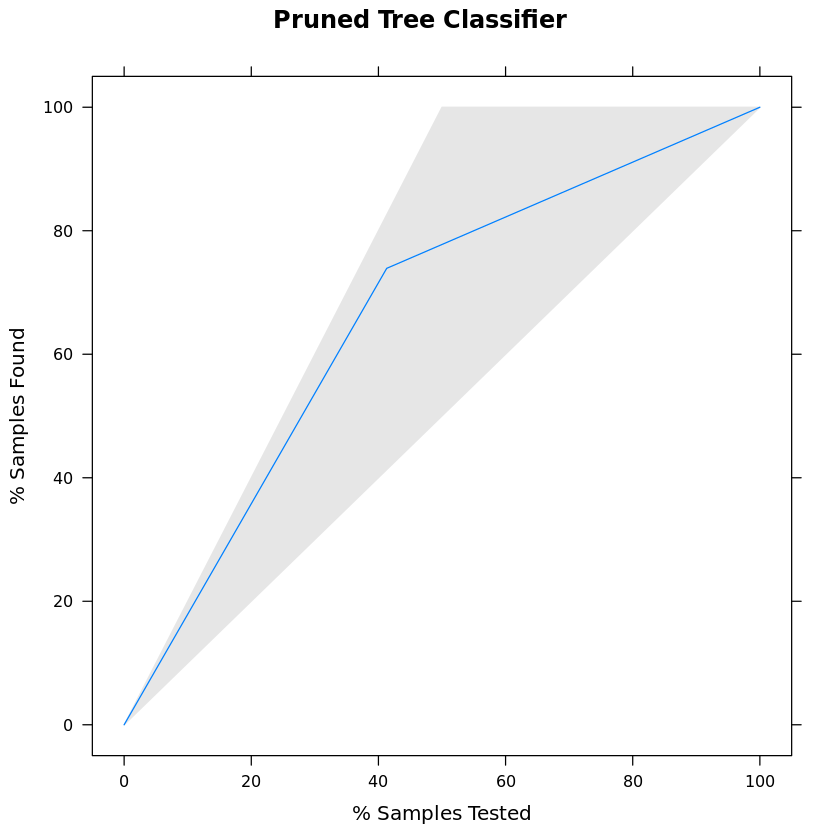

k-Nearest Neighbors 

68 samples
18 predictors
 2 classes: '0', '1' 

Pre-processing: centered (18), scaled (18) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 61, 62, 61, 61, 61, 61, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.8285714  0.6452990
   7  0.7777778  0.5348941
   9  0.7722222  0.5202771
  11  0.7523810  0.4754383
  13  0.7309524  0.4337615
  15  0.7412698  0.4567852
  17  0.7412698  0.4567514
  19  0.7412698  0.4567514
  21  0.7365079  0.4419741
  23  0.7365079  0.4418972

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 18  8
         1  5 15
                                          
               Accuracy : 0.7174          
                 95% CI : (0.5654, 0.8401)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.002267    

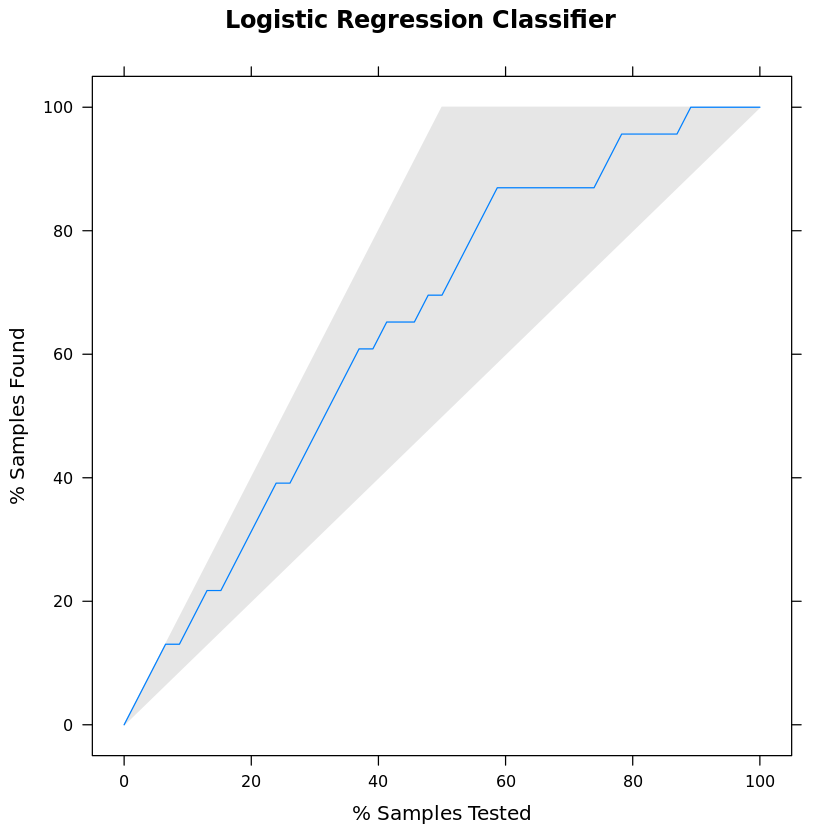

[1] "Random Forest"


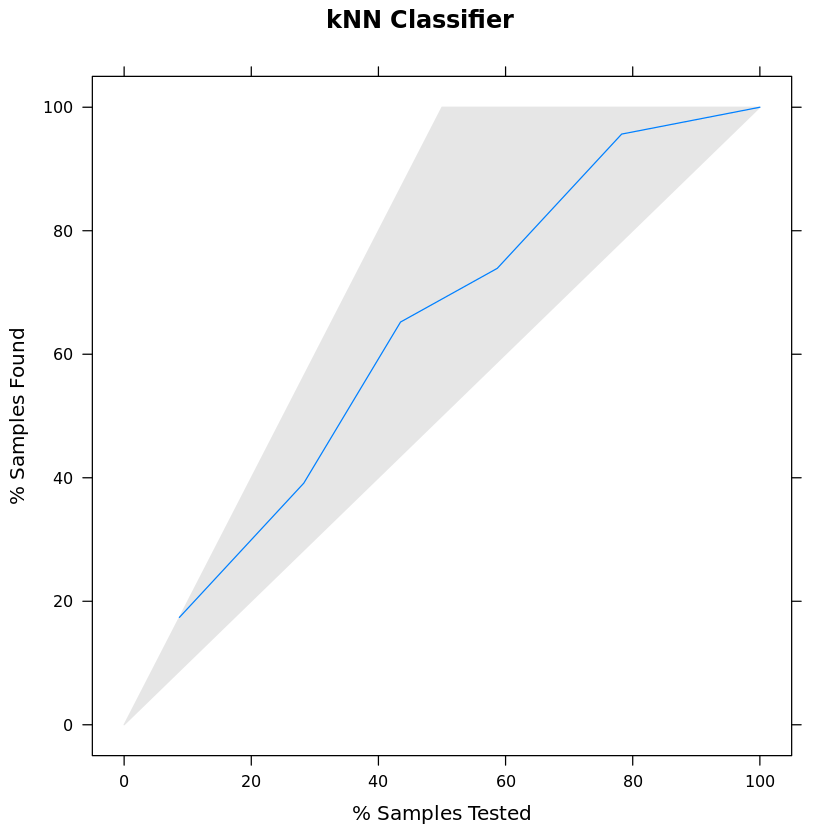

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 21  5
         1  2 18
                                          
               Accuracy : 0.8478          
                 95% CI : (0.7113, 0.9366)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.0000009158    
                                          
                  Kappa : 0.6957          
                                          
 Mcnemar's Test P-Value : 0.4497          
                                          
            Sensitivity : 0.9130          
            Specificity : 0.7826          
         Pos Pred Value : 0.8077          
         Neg Pred Value : 0.9000          
             Prevalence : 0.5000          
         Detection Rate : 0.4565          
   Detection Prevalence : 0.5652          
      Balanced Accuracy : 0.8478          
                                          
       'Positive' Class : 0               
                                    

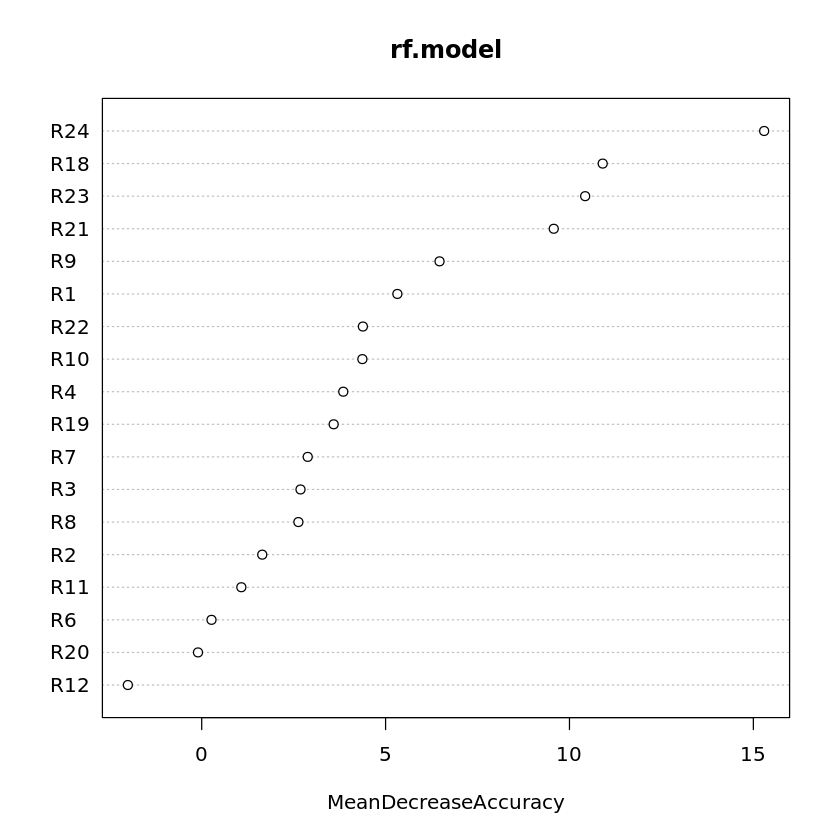

[1] "Boost"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 21  7
         1  2 16
                                          
               Accuracy : 0.8043          
                 95% CI : (0.6609, 0.9064)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.00002028      
                                          
                  Kappa : 0.6087          
                                          
 Mcnemar's Test P-Value : 0.1824          
                                          
            Sensitivity : 0.9130          
            Specificity : 0.6957          
         Pos Pred Value : 0.7500          
         Neg Pred Value : 0.8889          
             Prevalence : 0.5000          
         Detection Rate : 0.4565          
   Detection Prevalence : 0.6087          
      Balanced Accuracy : 0.8043          
                                          
       'Positive' Class : 0               
                        

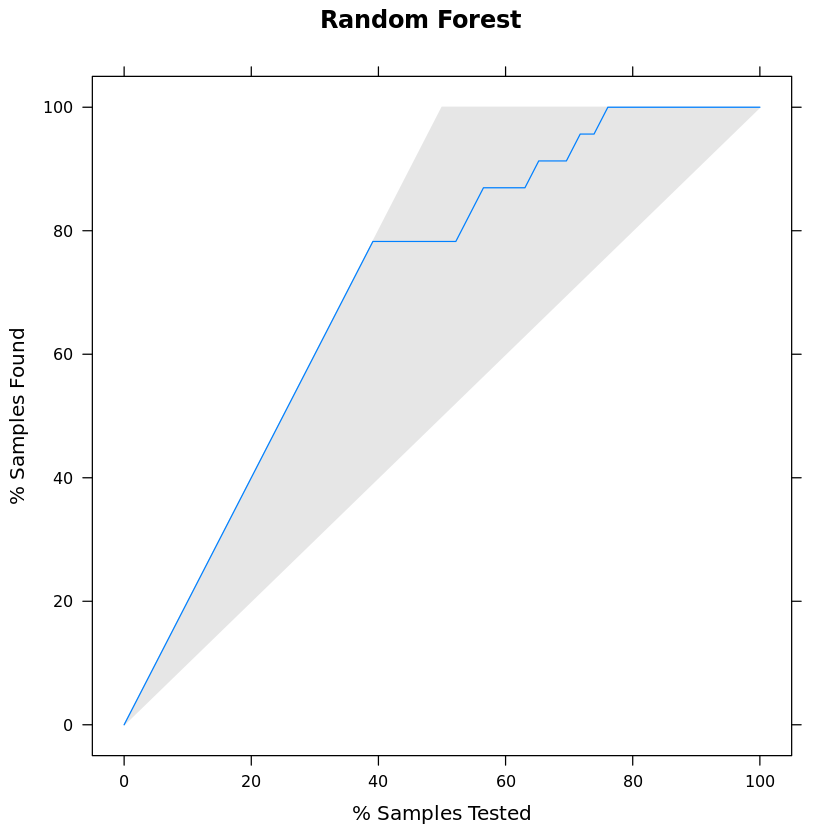

[1] "XGBoost"
[1]	train-rmse:0.778346 
[2]	train-rmse:0.569235 
[3]	train-rmse:0.412779 
[4]	train-rmse:0.301094 
[5]	train-rmse:0.221106 
[6]	train-rmse:0.161784 
[7]	train-rmse:0.119273 
[8]	train-rmse:0.088164 
[9]	train-rmse:0.065859 
[10]	train-rmse:0.049544 
[11]	train-rmse:0.037601 
[12]	train-rmse:0.029142 
[13]	train-rmse:0.022871 
[14]	train-rmse:0.017766 
[15]	train-rmse:0.014019 
[16]	train-rmse:0.011298 
[17]	train-rmse:0.009130 
[18]	train-rmse:0.007484 
[19]	train-rmse:0.006292 
[20]	train-rmse:0.005231 
[21]	train-rmse:0.004382 
[22]	train-rmse:0.003690 
[23]	train-rmse:0.003152 
[24]	train-rmse:0.002683 
[25]	train-rmse:0.002289 
[26]	train-rmse:0.001920 
[27]	train-rmse:0.001622 
[28]	train-rmse:0.001382 
[29]	train-rmse:0.001189 
[30]	train-rmse:0.001031 
[31]	train-rmse:0.000879 
[32]	train-rmse:0.000767 
[33]	train-rmse:0.000673 
[34]	train-rmse:0.000600 
[35]	train-rmse:0.000574 
[36]	train-rmse:0.000540 
[37]	train-rmse:0.000539 
[38]	train-rmse:0.000539 
[39]	tr

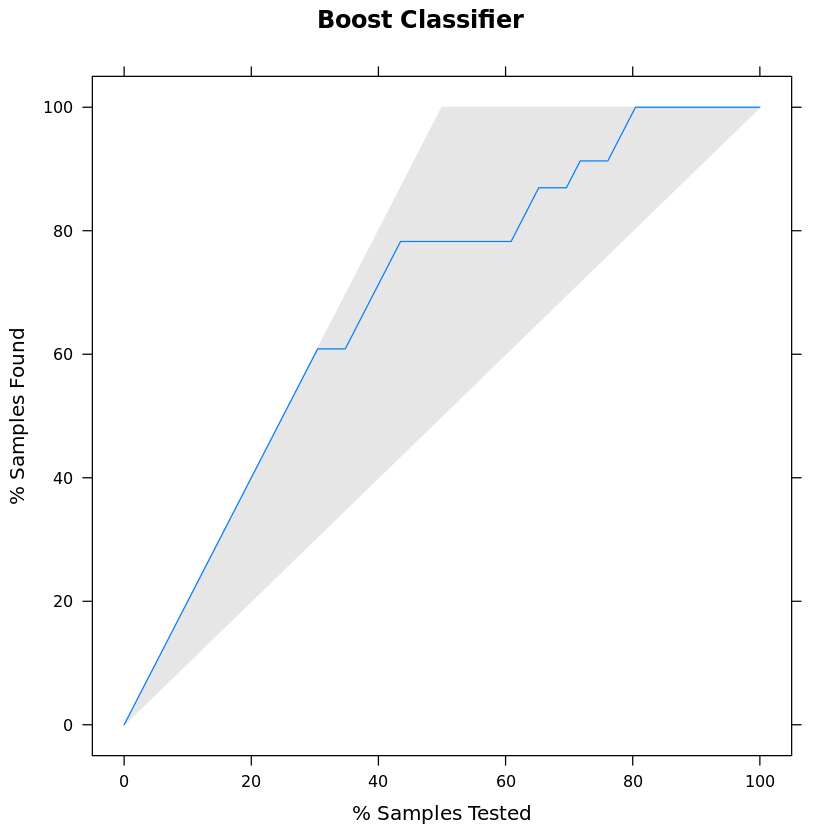

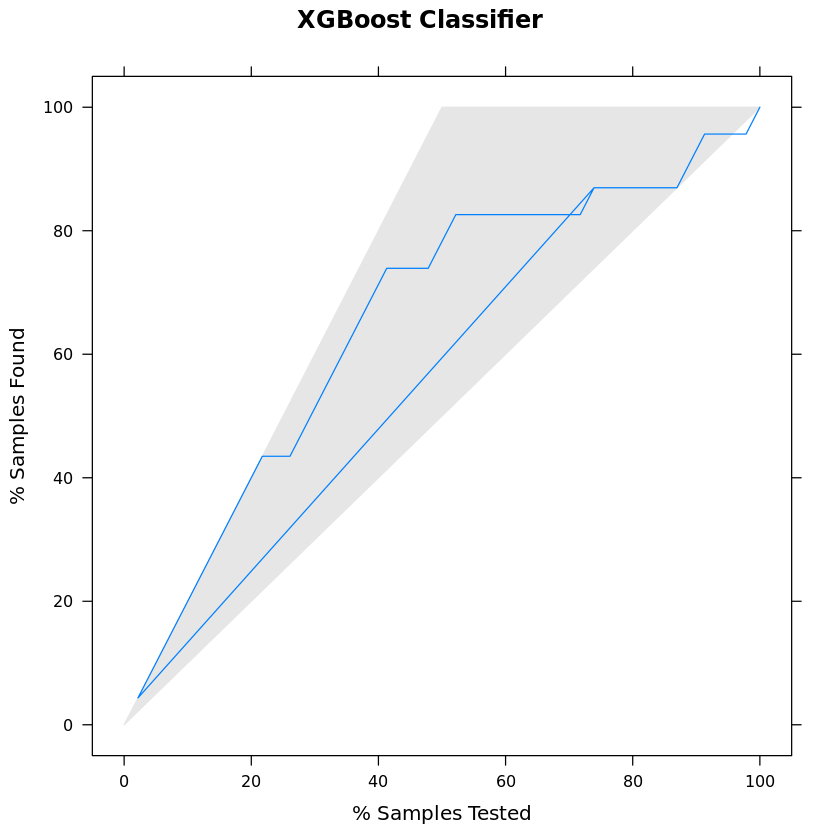

In [33]:
# Remove outlier records
run_models(bankrupt.df[-c(16,44,49,58,66,67,77,78,87,91,95,98,100,104,107,125,126,129),], TRUE)

[1] "Basic Tree"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 34  6
         1  4 24
                                          
               Accuracy : 0.8529          
                 95% CI : (0.7461, 0.9272)
    No Information Rate : 0.5588          
    P-Value [Acc > NIR] : 0.0000002255    
                                          
                  Kappa : 0.6996          
                                          
 Mcnemar's Test P-Value : 0.7518          
                                          
            Sensitivity : 0.8947          
            Specificity : 0.8000          
         Pos Pred Value : 0.8500          
         Neg Pred Value : 0.8571          
             Prevalence : 0.5588          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.5882          
      Balanced Accuracy : 0.8474          
                                          
       'Positive' Class : 0               
                   

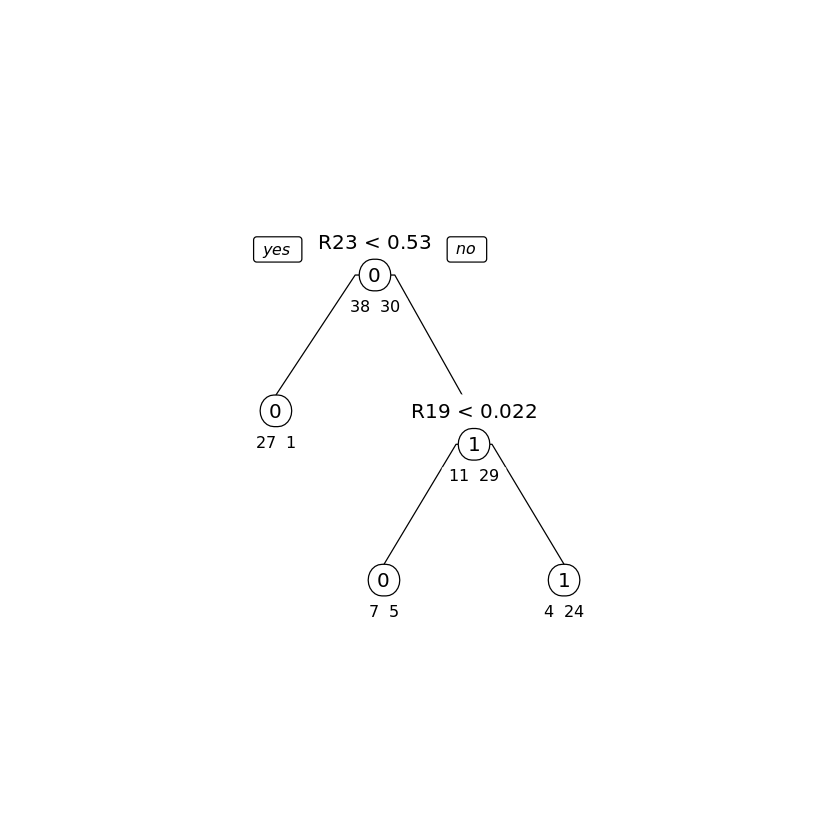

[1] "Pruned Tree"

Classification tree:
rpart(formula = D ~ ., data = df, method = "class", cp = cp, 
    minsplit = 3, xval = 5)

Variables actually used in tree construction:
[1] R18 R19 R22 R23 R7 

Root node error: 53/114 = 0.46491

n= 114 

         CP nsplit rel error  xerror     xstd
1 0.6415094      0  1.000000 1.00000 0.100479
2 0.0754717      1  0.358491 0.43396 0.080846
3 0.0188679      2  0.283019 0.41509 0.079502
4 0.0075472     13  0.056604 0.47170 0.083356
5 0.0000100     18  0.018868 0.50943 0.085647


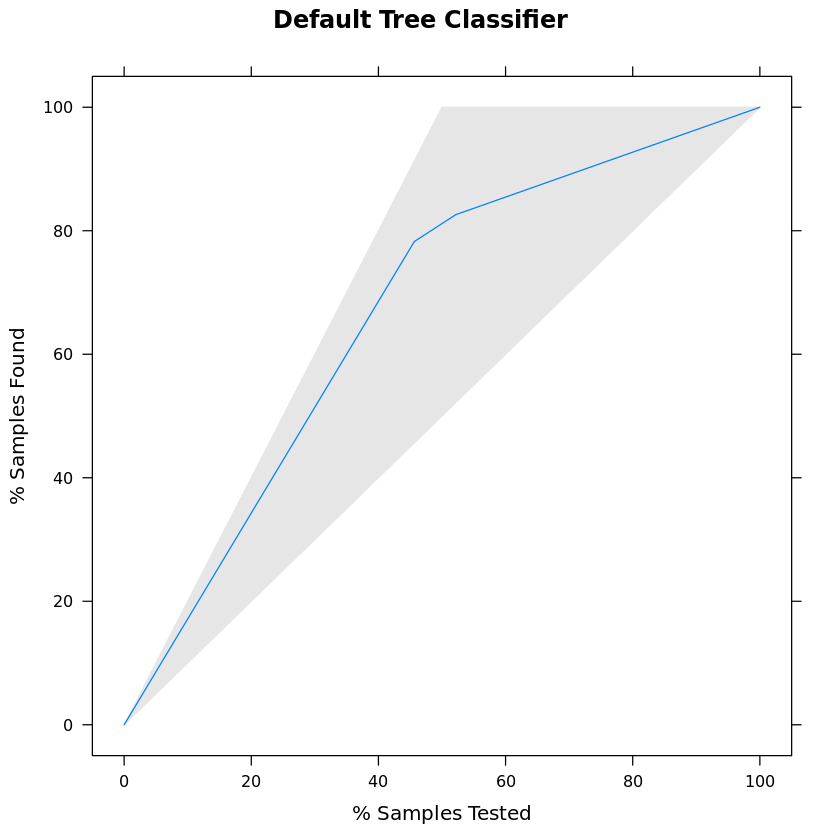

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 32  3
         1  6 27
                                          
               Accuracy : 0.8676          
                 95% CI : (0.7636, 0.9377)
    No Information Rate : 0.5588          
    P-Value [Acc > NIR] : 0.000000047     
                                          
                  Kappa : 0.7344          
                                          
 Mcnemar's Test P-Value : 0.505           
                                          
            Sensitivity : 0.8421          
            Specificity : 0.9000          
         Pos Pred Value : 0.9143          
         Neg Pred Value : 0.8182          
             Prevalence : 0.5588          
         Detection Rate : 0.4706          
   Detection Prevalence : 0.5147          
      Balanced Accuracy : 0.8711          
                                          
       'Positive' Class : 0               
                                    

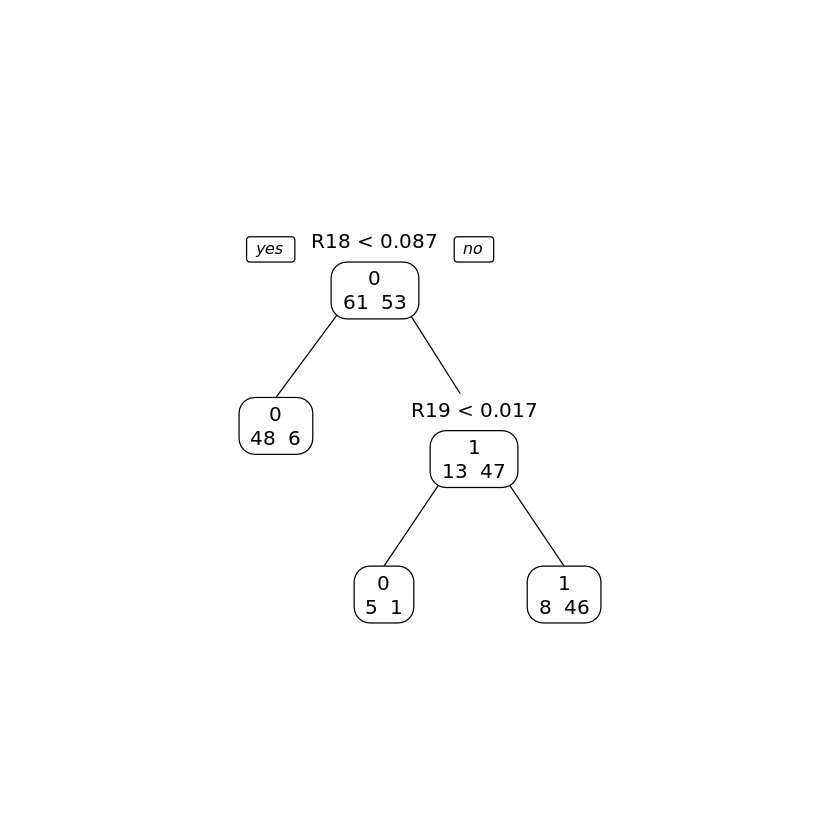

[1] "Logistic Regression"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 21  9
         1  2 14
                                          
               Accuracy : 0.7609          
                 95% CI : (0.6123, 0.8741)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.0002678       
                                          
                  Kappa : 0.5217          
                                          
 Mcnemar's Test P-Value : 0.0704404       
                                          
            Sensitivity : 0.9130          
            Specificity : 0.6087          
         Pos Pred Value : 0.7000          
         Neg Pred Value : 0.8750          
             Prevalence : 0.5000          
         Detection Rate : 0.4565          
   Detection Prevalence : 0.6522          
      Balanced Accuracy : 0.7609          
                                          
       'Positive' Class : 0               
          

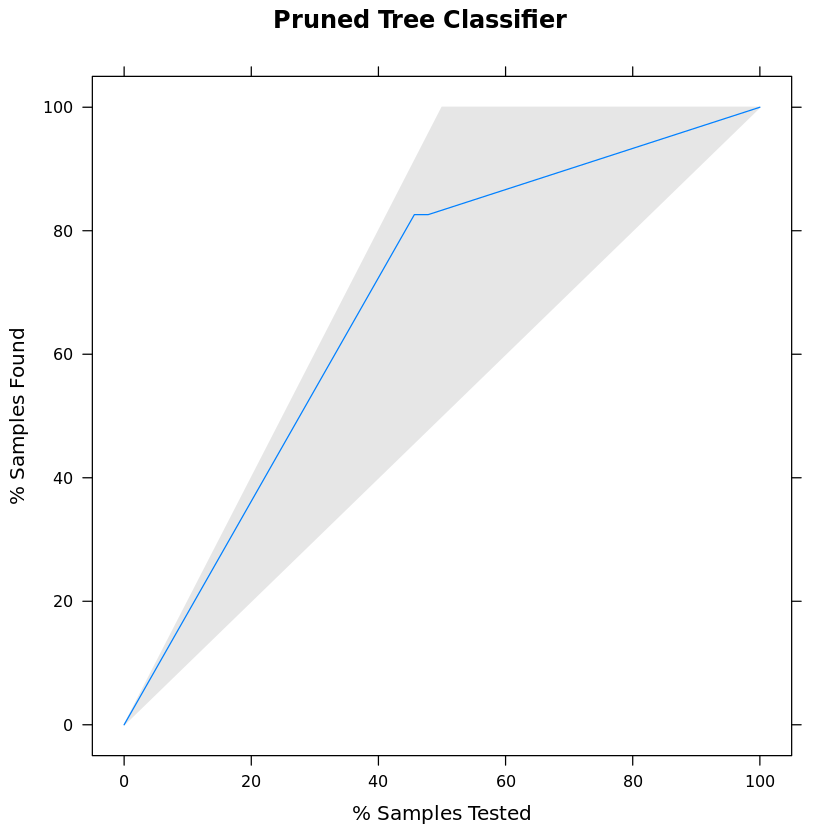

k-Nearest Neighbors 

68 samples
 5 predictor
 2 classes: '0', '1' 

Pre-processing: centered (5), scaled (5) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 61, 62, 61, 61, 61, 61, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7103175  0.4124805
   7  0.7015873  0.3932035
   9  0.7269841  0.4472209
  11  0.7460317  0.4867474
  13  0.7555556  0.5045010
  15  0.7801587  0.5592847
  17  0.7904762  0.5804731
  19  0.7650794  0.5271320
  21  0.7650794  0.5261591
  23  0.7587302  0.5174727

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 17.
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 22  9
         1  1 14
                                          
               Accuracy : 0.7826          
                 95% CI : (0.6364, 0.8905)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.00007821    

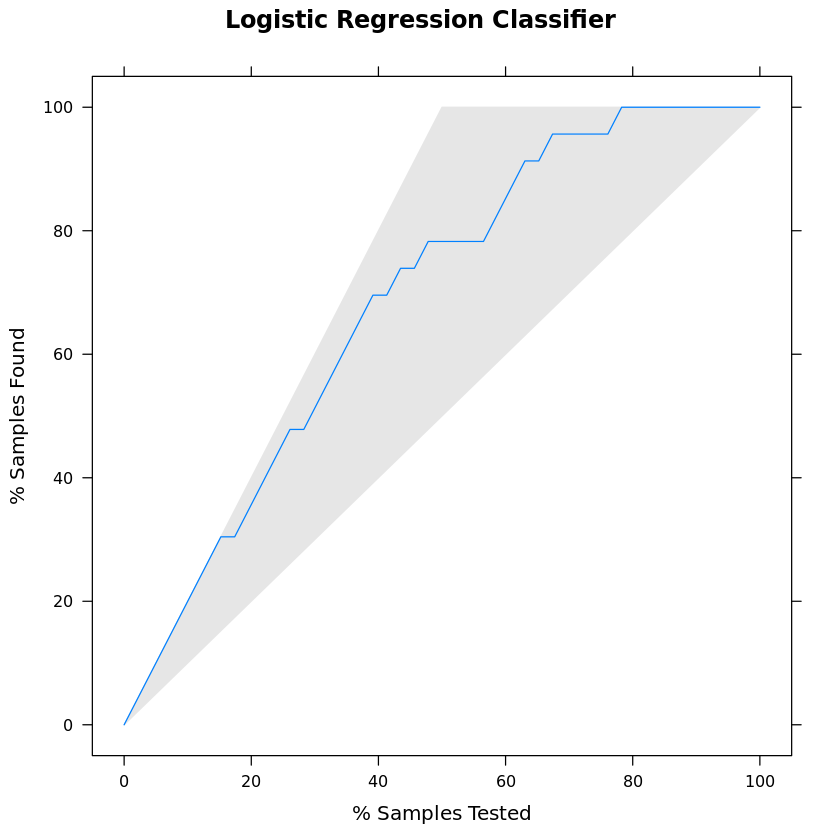

[1] "Random Forest"


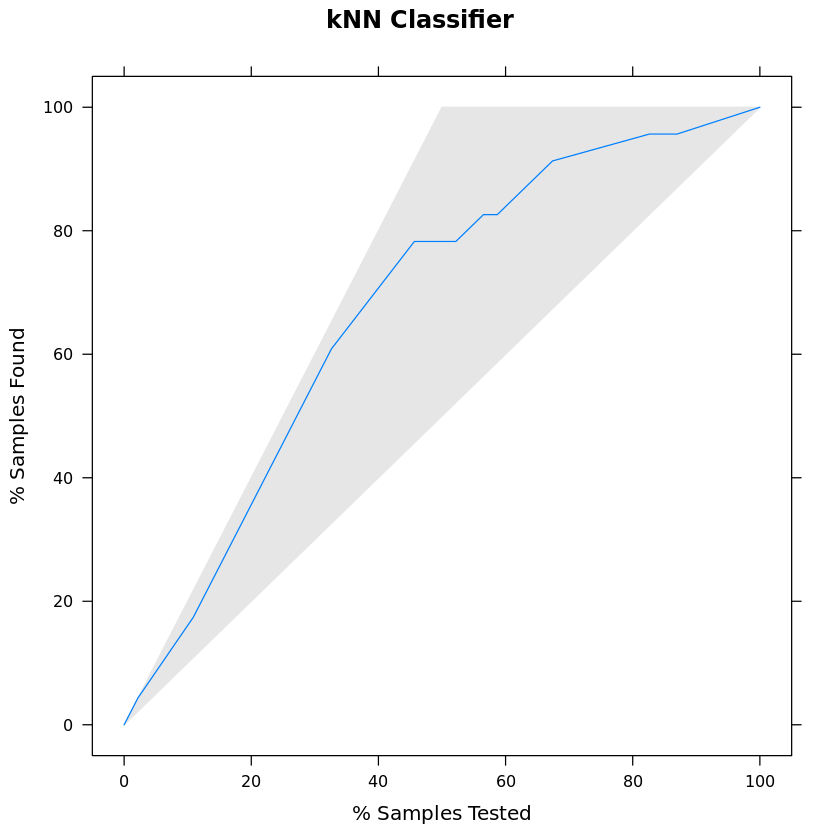

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 22  6
         1  1 17
                                          
               Accuracy : 0.8478          
                 95% CI : (0.7113, 0.9366)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.0000009158    
                                          
                  Kappa : 0.6957          
                                          
 Mcnemar's Test P-Value : 0.1306          
                                          
            Sensitivity : 0.9565          
            Specificity : 0.7391          
         Pos Pred Value : 0.7857          
         Neg Pred Value : 0.9444          
             Prevalence : 0.5000          
         Detection Rate : 0.4783          
   Detection Prevalence : 0.6087          
      Balanced Accuracy : 0.8478          
                                          
       'Positive' Class : 0               
                                    

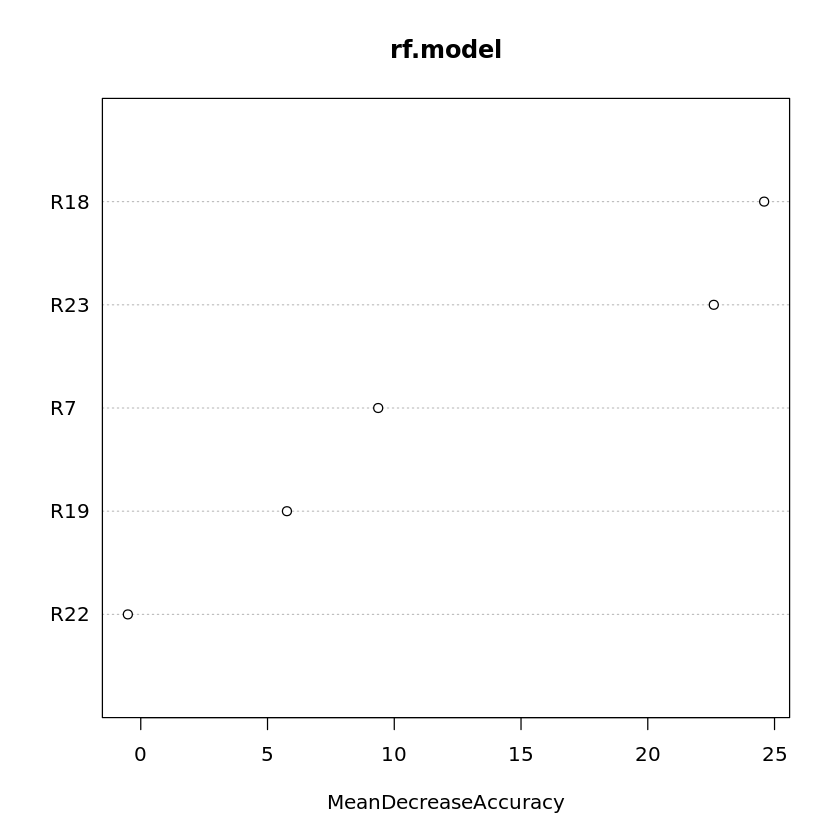

[1] "Boost"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 21  6
         1  2 17
                                          
               Accuracy : 0.8261          
                 95% CI : (0.6858, 0.9218)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.000004624     
                                          
                  Kappa : 0.6522          
                                          
 Mcnemar's Test P-Value : 0.2888          
                                          
            Sensitivity : 0.9130          
            Specificity : 0.7391          
         Pos Pred Value : 0.7778          
         Neg Pred Value : 0.8947          
             Prevalence : 0.5000          
         Detection Rate : 0.4565          
   Detection Prevalence : 0.5870          
      Balanced Accuracy : 0.8261          
                                          
       'Positive' Class : 0               
                        

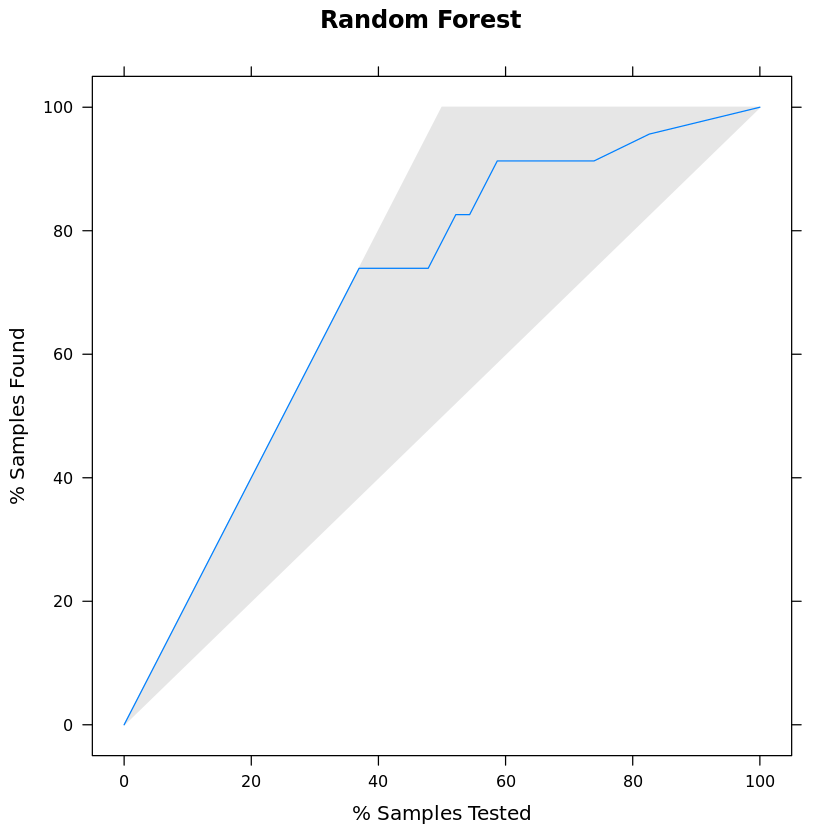

[1] "XGBoost"
[1]	train-rmse:0.789516 
[2]	train-rmse:0.585176 
[3]	train-rmse:0.433368 
[4]	train-rmse:0.326014 
[5]	train-rmse:0.242903 
[6]	train-rmse:0.185676 
[7]	train-rmse:0.145067 
[8]	train-rmse:0.114048 
[9]	train-rmse:0.088526 
[10]	train-rmse:0.069611 
[11]	train-rmse:0.055841 
[12]	train-rmse:0.045187 
[13]	train-rmse:0.037372 
[14]	train-rmse:0.031441 
[15]	train-rmse:0.026091 
[16]	train-rmse:0.022814 
[17]	train-rmse:0.019283 
[18]	train-rmse:0.016304 
[19]	train-rmse:0.013600 
[20]	train-rmse:0.011963 
[21]	train-rmse:0.010084 
[22]	train-rmse:0.009298 
[23]	train-rmse:0.007898 
[24]	train-rmse:0.006967 
[25]	train-rmse:0.006135 
[26]	train-rmse:0.005643 
[27]	train-rmse:0.005136 
[28]	train-rmse:0.004342 
[29]	train-rmse:0.003711 
[30]	train-rmse:0.003290 
[31]	train-rmse:0.003091 
[32]	train-rmse:0.002568 
[33]	train-rmse:0.002440 
[34]	train-rmse:0.002220 
[35]	train-rmse:0.001919 
[36]	train-rmse:0.001575 
[37]	train-rmse:0.001345 
[38]	train-rmse:0.001229 
[39]	tr

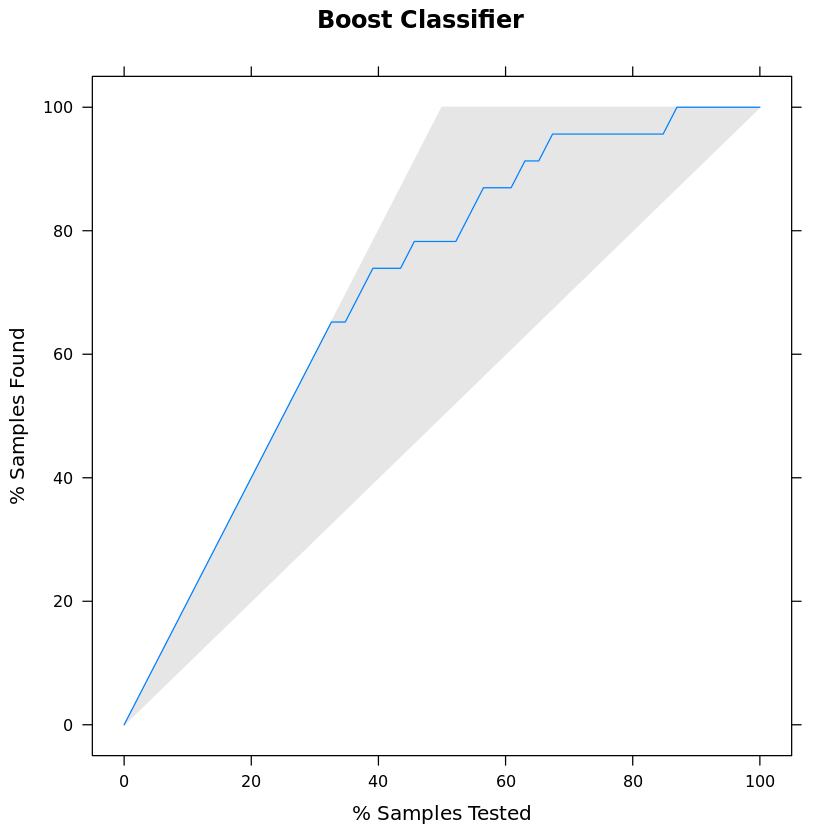

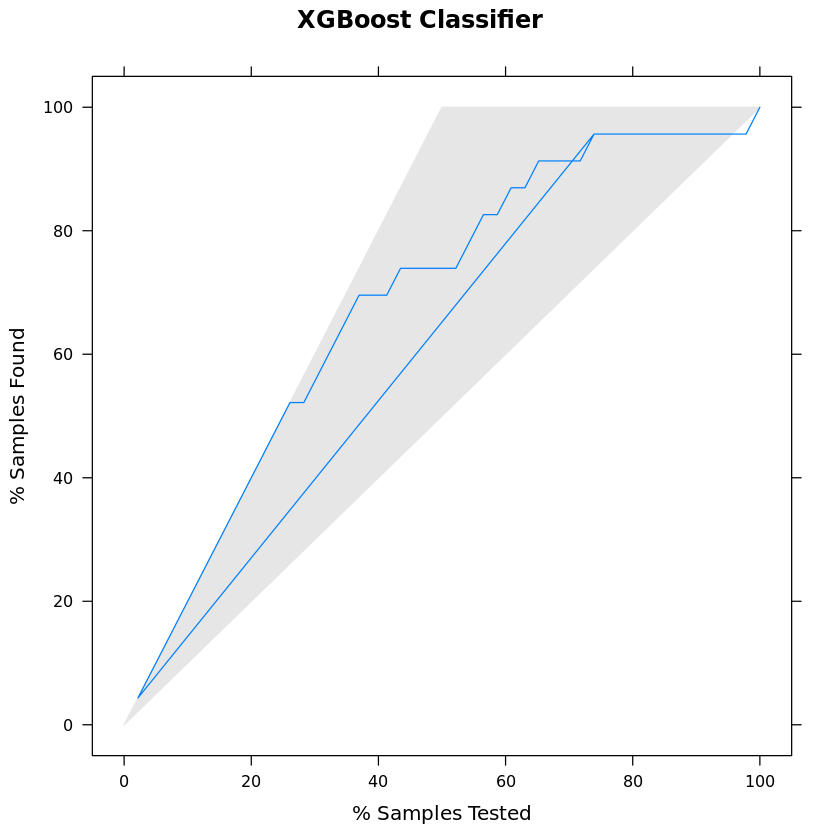

In [34]:
# Remove outlier records & reduce feature
run_models(bankrupt.df[-c(16,44,49,58,66,67,77,78,87,91,95,98,100,104,107,125,126,129),c("D","R7","R18","R19","R22","R23")], TRUE)

[1] "Basic Tree"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 29  0
         1  9 30
                                          
               Accuracy : 0.8676          
                 95% CI : (0.7636, 0.9377)
    No Information Rate : 0.5588          
    P-Value [Acc > NIR] : 0.000000047     
                                          
                  Kappa : 0.7398          
                                          
 Mcnemar's Test P-Value : 0.007661        
                                          
            Sensitivity : 0.7632          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.7692          
             Prevalence : 0.5588          
         Detection Rate : 0.4265          
   Detection Prevalence : 0.4265          
      Balanced Accuracy : 0.8816          
                                          
       'Positive' Class : 0               
                   

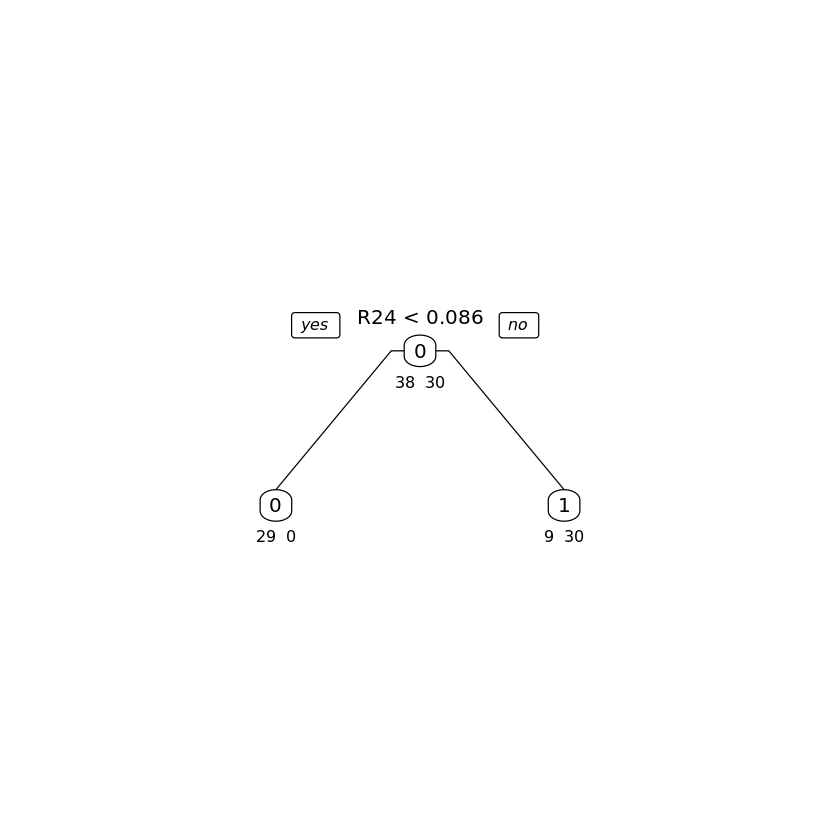

[1] "Pruned Tree"

Classification tree:
rpart(formula = D ~ ., data = df, method = "class", cp = cp, 
    minsplit = 3, xval = 5)

Variables actually used in tree construction:
[1] R14 R21 R23 R24 R9 

Root node error: 53/114 = 0.46491

n= 114 

         CP nsplit rel error  xerror     xstd
1 0.6792453      0  1.000000 1.00000 0.100479
2 0.0283019      1  0.320755 0.39623 0.078095
3 0.0188679      5  0.207547 0.49057 0.084528
4 0.0094340     10  0.113208 0.49057 0.084528
5 0.0062893     16  0.056604 0.50943 0.085647
6 0.0000100     19  0.037736 0.50943 0.085647


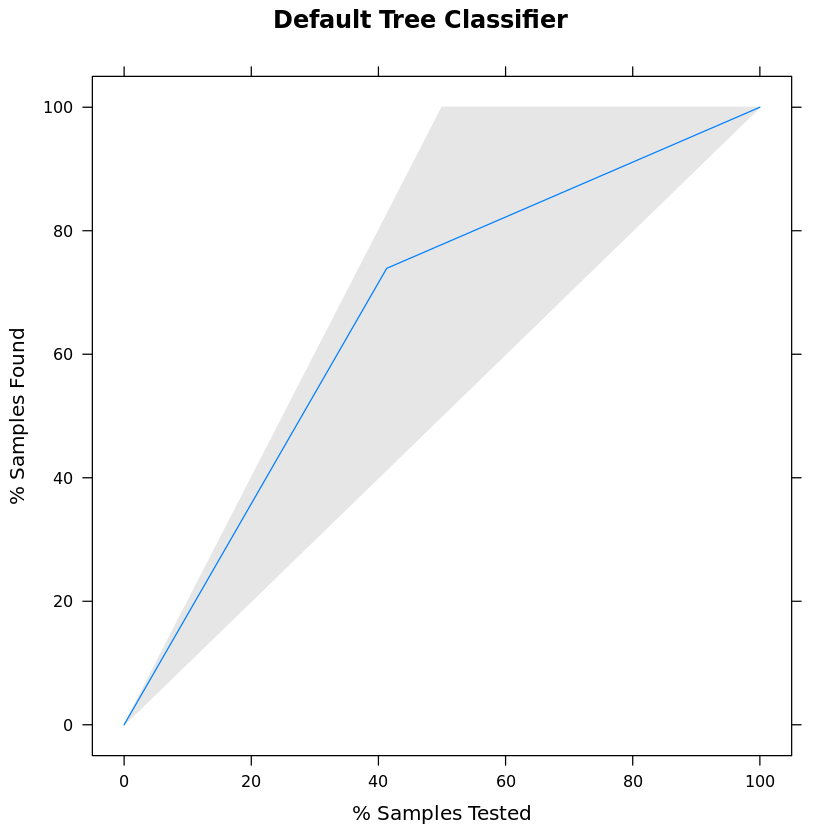

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 29  0
         1  9 30
                                          
               Accuracy : 0.8676          
                 95% CI : (0.7636, 0.9377)
    No Information Rate : 0.5588          
    P-Value [Acc > NIR] : 0.000000047     
                                          
                  Kappa : 0.7398          
                                          
 Mcnemar's Test P-Value : 0.007661        
                                          
            Sensitivity : 0.7632          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.7692          
             Prevalence : 0.5588          
         Detection Rate : 0.4265          
   Detection Prevalence : 0.4265          
      Balanced Accuracy : 0.8816          
                                          
       'Positive' Class : 0               
                                    

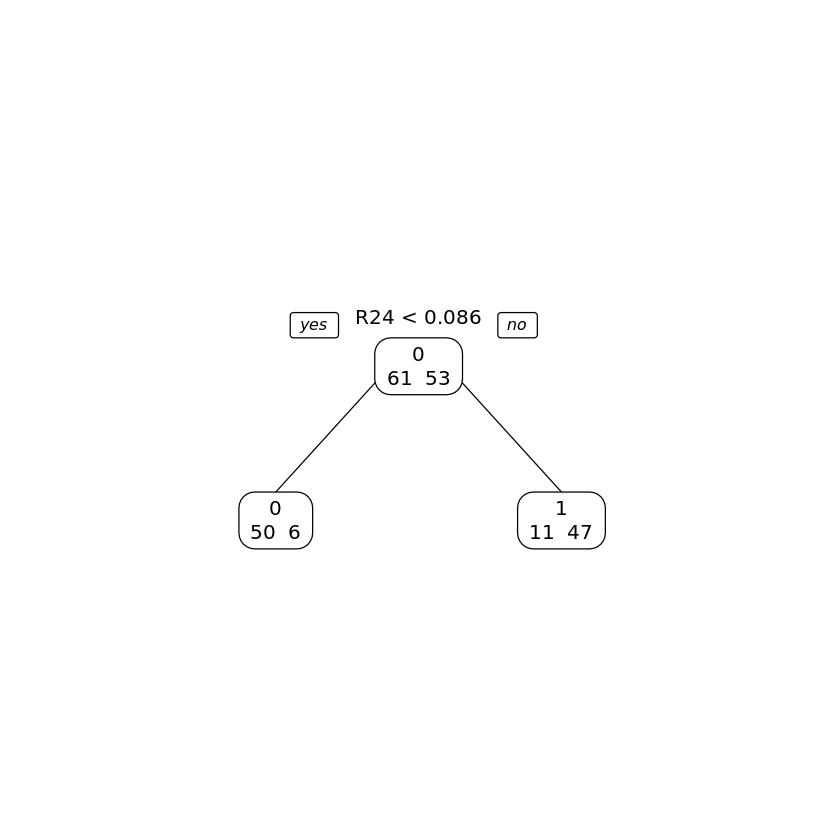

[1] "Logistic Regression"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 23  7
         1  0 16
                                          
               Accuracy : 0.8478          
                 95% CI : (0.7113, 0.9366)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.0000009158    
                                          
                  Kappa : 0.6957          
                                          
 Mcnemar's Test P-Value : 0.02334         
                                          
            Sensitivity : 1.0000          
            Specificity : 0.6957          
         Pos Pred Value : 0.7667          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5000          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.6522          
      Balanced Accuracy : 0.8478          
                                          
       'Positive' Class : 0               
          

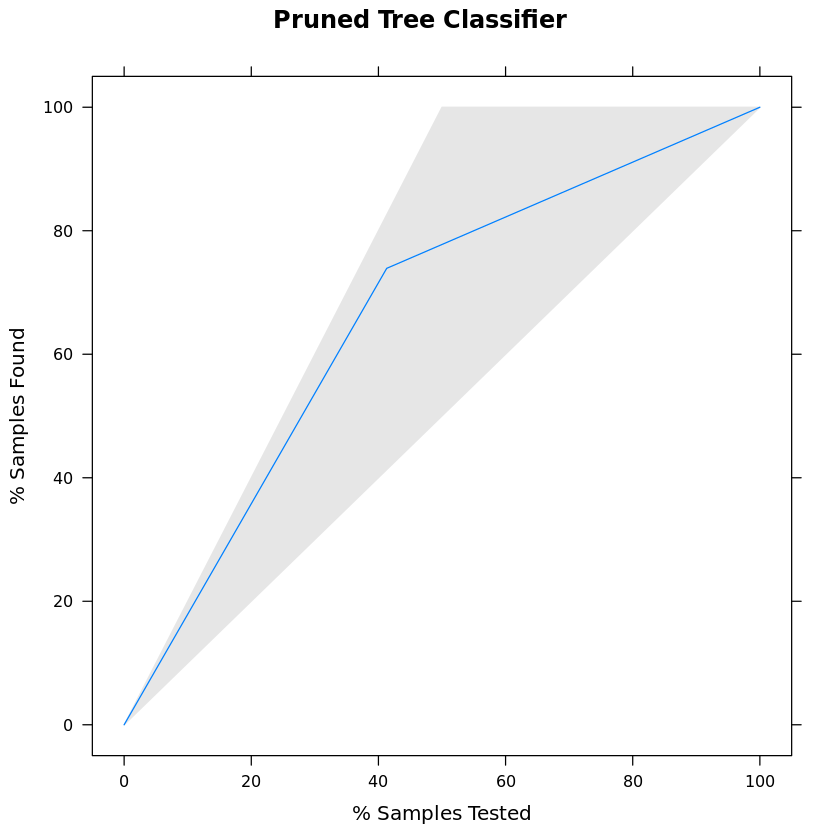

k-Nearest Neighbors 

68 samples
 5 predictor
 2 classes: '0', '1' 

Pre-processing: centered (5), scaled (5) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 61, 62, 61, 61, 61, 61, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7825397  0.5578339
   7  0.7761905  0.5457474
   9  0.7571429  0.5093701
  11  0.7857143  0.5669257
  13  0.8111111  0.6170034
  15  0.7857143  0.5611168
  17  0.7904762  0.5695279
  19  0.8007937  0.5873254
  21  0.8055556  0.5958810
  23  0.8055556  0.5942578

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 13.
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 23  6
         1  0 17
                                          
               Accuracy : 0.8696          
                 95% CI : (0.7374, 0.9506)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.0000001551  

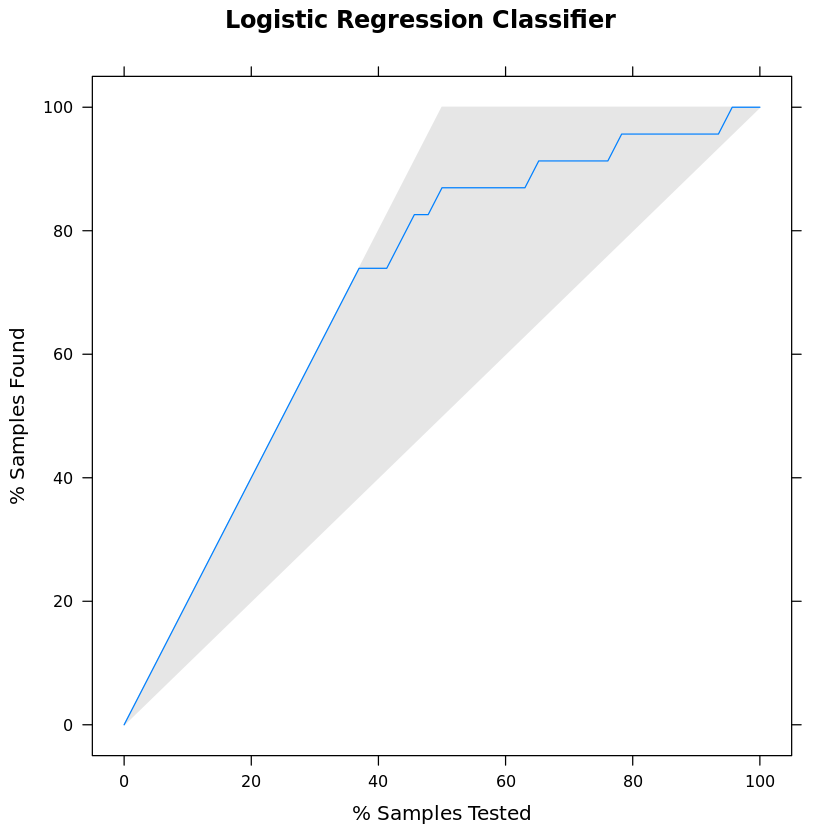

[1] "Random Forest"


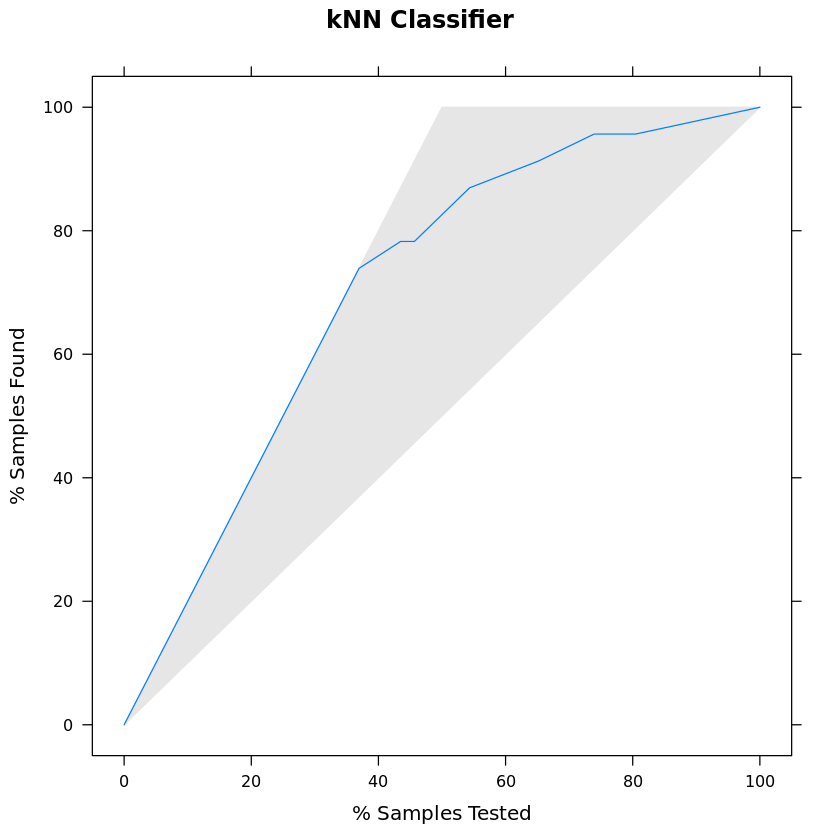

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 21  7
         1  2 16
                                          
               Accuracy : 0.8043          
                 95% CI : (0.6609, 0.9064)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.00002028      
                                          
                  Kappa : 0.6087          
                                          
 Mcnemar's Test P-Value : 0.1824          
                                          
            Sensitivity : 0.9130          
            Specificity : 0.6957          
         Pos Pred Value : 0.7500          
         Neg Pred Value : 0.8889          
             Prevalence : 0.5000          
         Detection Rate : 0.4565          
   Detection Prevalence : 0.6087          
      Balanced Accuracy : 0.8043          
                                          
       'Positive' Class : 0               
                                    

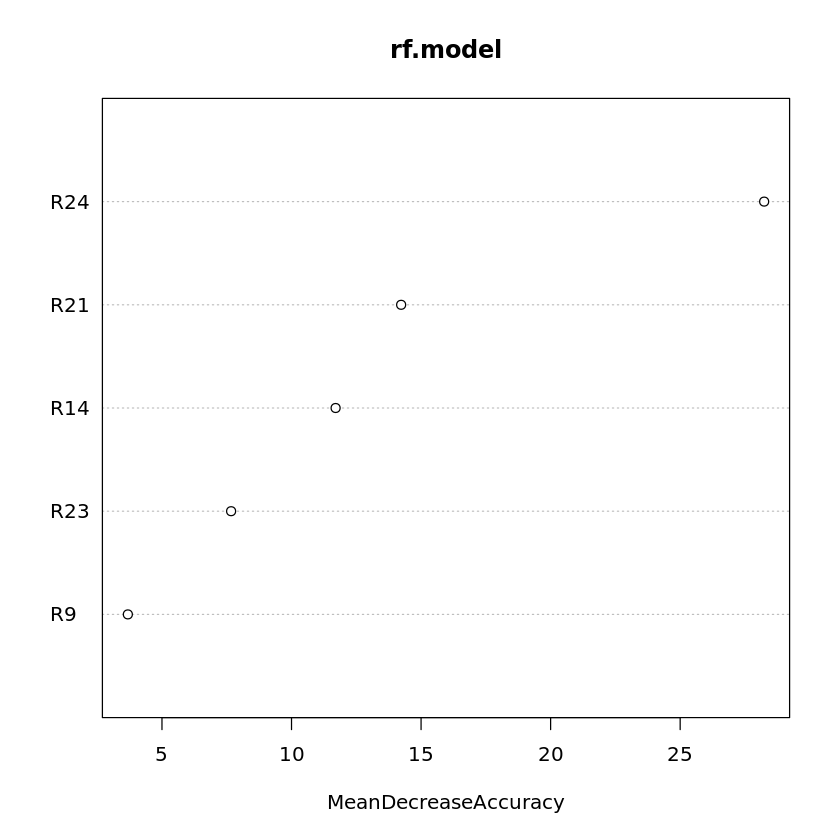

[1] "Boost"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 21  5
         1  2 18
                                          
               Accuracy : 0.8478          
                 95% CI : (0.7113, 0.9366)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.0000009158    
                                          
                  Kappa : 0.6957          
                                          
 Mcnemar's Test P-Value : 0.4497          
                                          
            Sensitivity : 0.9130          
            Specificity : 0.7826          
         Pos Pred Value : 0.8077          
         Neg Pred Value : 0.9000          
             Prevalence : 0.5000          
         Detection Rate : 0.4565          
   Detection Prevalence : 0.5652          
      Balanced Accuracy : 0.8478          
                                          
       'Positive' Class : 0               
                        

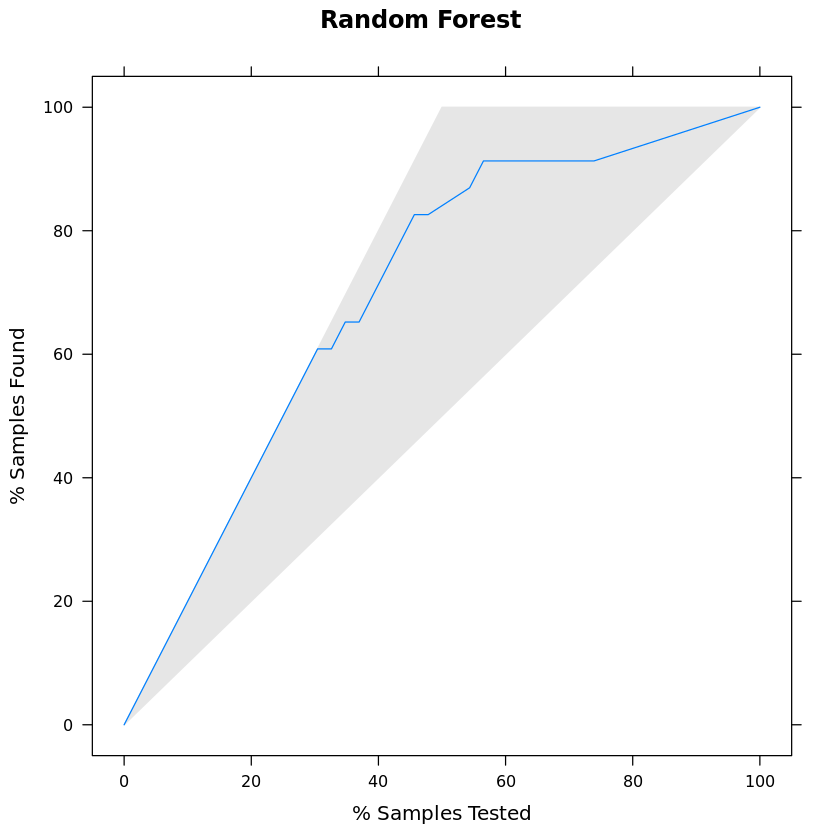

[1] "XGBoost"
[1]	train-rmse:0.783990 
[2]	train-rmse:0.578884 
[3]	train-rmse:0.437890 
[4]	train-rmse:0.329746 
[5]	train-rmse:0.247460 
[6]	train-rmse:0.184760 
[7]	train-rmse:0.141930 
[8]	train-rmse:0.110957 
[9]	train-rmse:0.085312 
[10]	train-rmse:0.066455 
[11]	train-rmse:0.053093 
[12]	train-rmse:0.042673 
[13]	train-rmse:0.034171 
[14]	train-rmse:0.027698 
[15]	train-rmse:0.022601 
[16]	train-rmse:0.018573 
[17]	train-rmse:0.015258 
[18]	train-rmse:0.012648 
[19]	train-rmse:0.010650 
[20]	train-rmse:0.008896 
[21]	train-rmse:0.007504 
[22]	train-rmse:0.006144 
[23]	train-rmse:0.005049 
[24]	train-rmse:0.004199 
[25]	train-rmse:0.003493 
[26]	train-rmse:0.002918 
[27]	train-rmse:0.002452 
[28]	train-rmse:0.002065 
[29]	train-rmse:0.001744 
[30]	train-rmse:0.001487 
[31]	train-rmse:0.001277 
[32]	train-rmse:0.001104 
[33]	train-rmse:0.000944 
[34]	train-rmse:0.000807 
[35]	train-rmse:0.000806 
[36]	train-rmse:0.000806 
[37]	train-rmse:0.000806 
[38]	train-rmse:0.000806 
[39]	tr

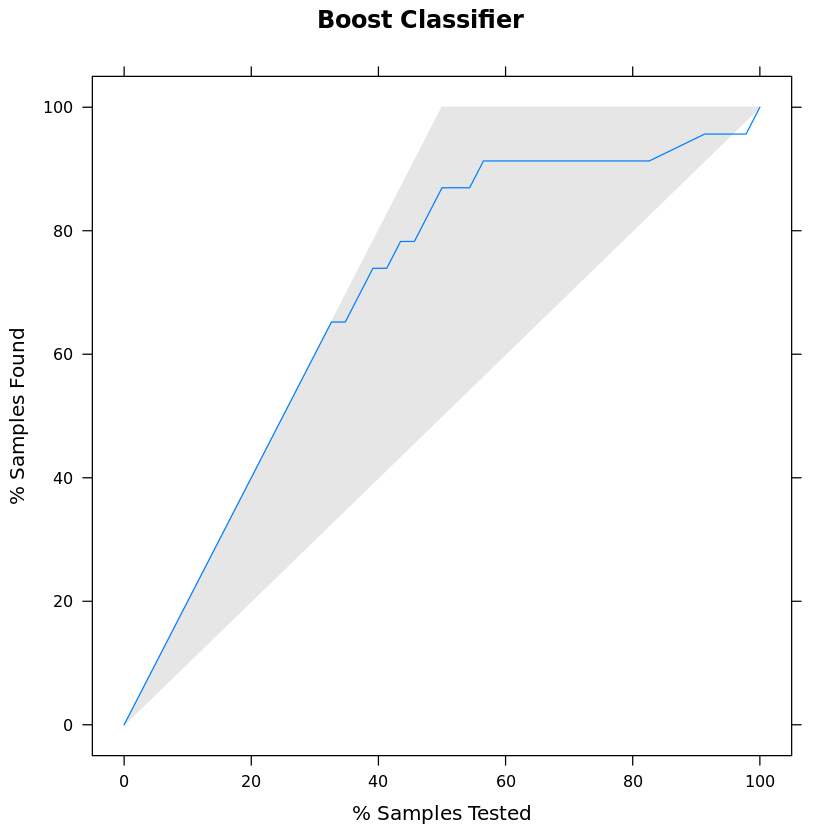

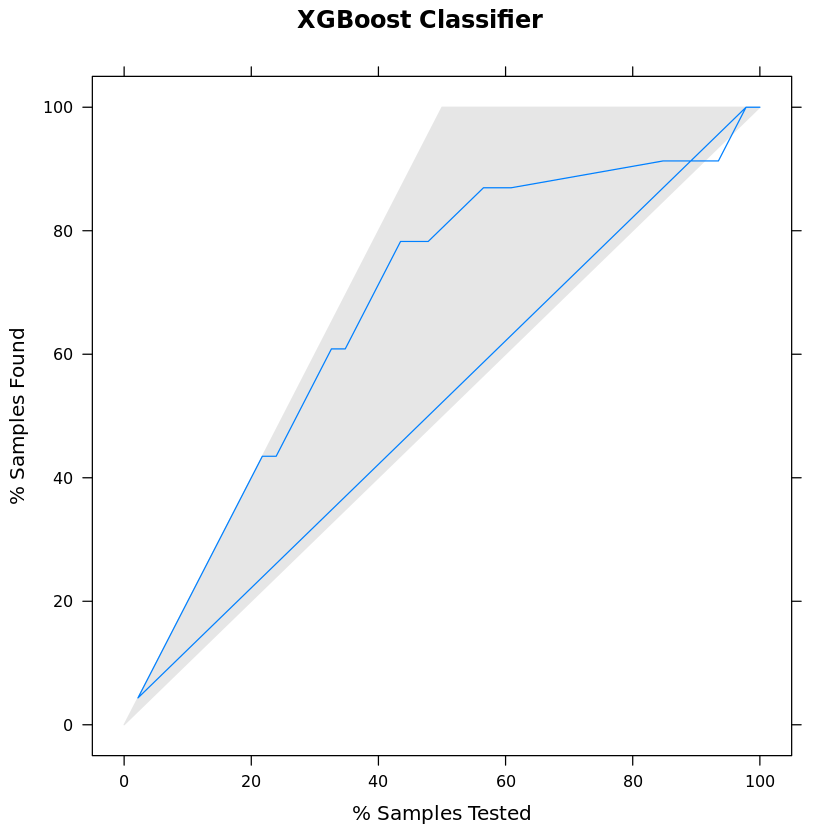

In [48]:
# Remove outlier records & top 5 features from H2O Driverless AI
run_models(bankrupt.df[-c(16,44,49,58,66,67,77,78,87,91,95,98,100,104,107,125,126,129),c("D","R9","R14","R21","R23","R24")], TRUE)